In [1]:
import json
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import hvplot.pandas

In [2]:
load_dotenv()

True

In [3]:
# Confirm the availability of your Glassnode API access key by checking its type
API_KEY = os.getenv("GLASSNODE_API_KEY")
if not API_KEY:
    print("Error with the glassnode.com API key. Check the .env file.")
type(API_KEY)

str

In [4]:
# define coin
coin = 'BTC'

In [5]:
# Build the first of three Level-2-Dataframes: Network Health

In [6]:
## Extract active address data

In [7]:
active_address = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count', params={'a': coin, 'api_key': API_KEY})

In [8]:
active_address_df = pd.read_json(active_address.text, convert_dates=['t'])
active_address_df.set_index('t', inplace=True)
active_address_df=active_address_df.rename(columns={'v':'Active Address'})
active_address_df

Active Address
t                         
2009-01-03               0
2009-01-04               0
2009-01-05               0
2009-01-06               0
2009-01-07               0
...                    ...
2021-07-04          850487
2021-07-05          920363
2021-07-06          838259
2021-07-07          812872
2021-07-08          800764

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Active Address'}, xlabel='t'>

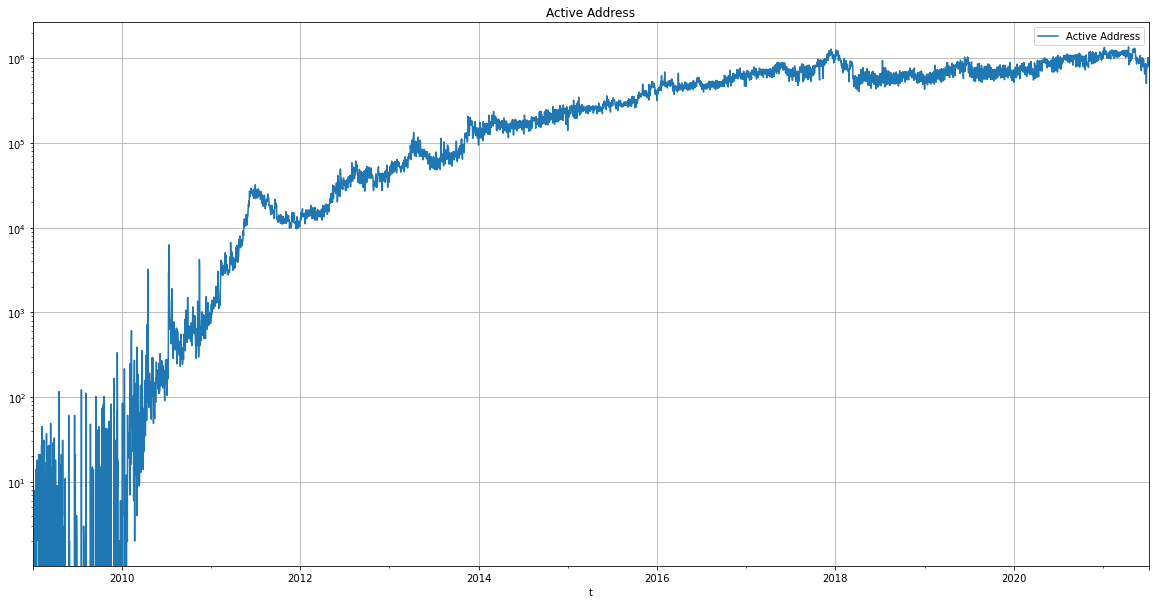

In [9]:
active_address_df.plot(figsize=(20,10), grid=True, logy=True, title='Active Address')

In [10]:
## Extract total transfer volume data

In [11]:
total_transfer_volume = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum', params={'a': coin, 'api_key': API_KEY})

In [12]:
total_transfer_volume_df = pd.read_json(total_transfer_volume.text, convert_dates=['t'])
total_transfer_volume_df.set_index('t', inplace=True)
total_transfer_volume_df = total_transfer_volume_df.rename(columns={'v':'Total Transfer Volume'})
total_transfer_volume_df

Total Transfer Volume
t                                
2009-01-03           0.000000e+00
2009-01-04           0.000000e+00
2009-01-05           0.000000e+00
2009-01-06           0.000000e+00
2009-01-07           0.000000e+00
...                           ...
2021-07-04           1.586243e+06
2021-07-05           1.439888e+06
2021-07-06           1.332011e+06
2021-07-07           1.324880e+06
2021-07-08           3.250505e+06

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Total Transfer Volume'}, xlabel='t'>

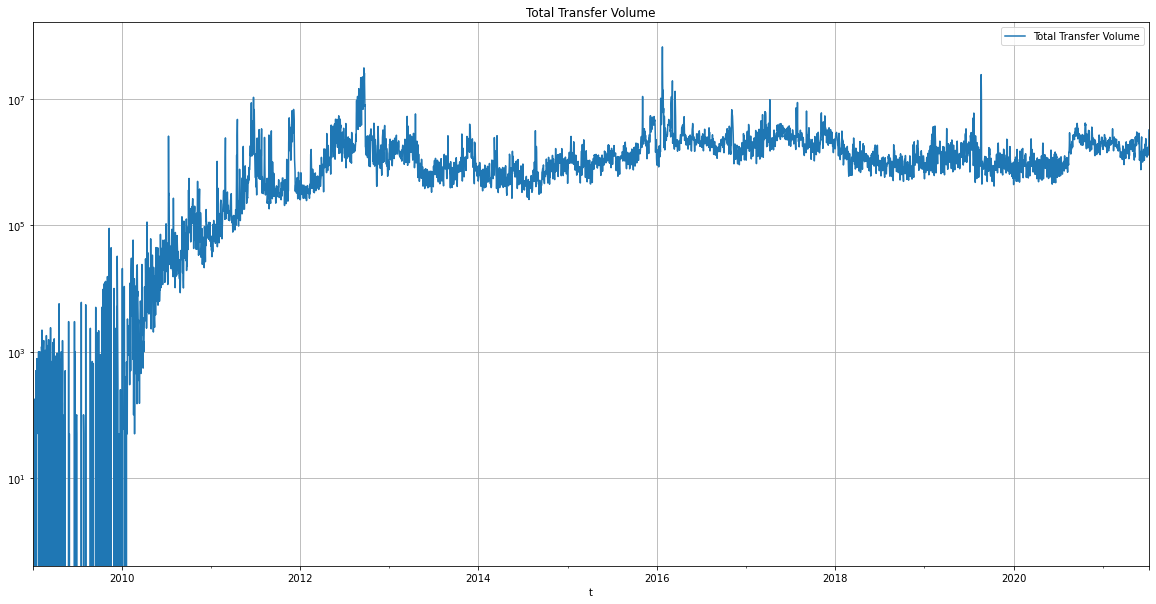

In [13]:
total_transfer_volume_df.plot(figsize=(20,10), grid=True, logy=True, title='Total Transfer Volume')

In [14]:
## Extract velocity data

In [15]:
velocity = requests.get('https://api.glassnode.com/v1/metrics/indicators/velocity', params={'a': coin, 'api_key': API_KEY})

In [16]:
velocity_df = pd.read_json(velocity.text, convert_dates=['t'])
velocity_df.set_index('t', inplace=True)
velocity_df = velocity_df.rename(columns={'v':'Velocity'})
velocity_df

Velocity
t                   
2010-07-18  0.010432
2010-07-19  0.013640
2010-07-20  0.008629
2010-07-21  0.007955
2010-07-22  0.011374
...              ...
2021-07-04  0.025518
2021-07-05  0.017975
2021-07-06  0.020433
2021-07-07  0.022266
2021-07-08  0.022810

[4009 rows x 1 columns]

<AxesSubplot:title={'center':'Velocity'}, xlabel='t'>

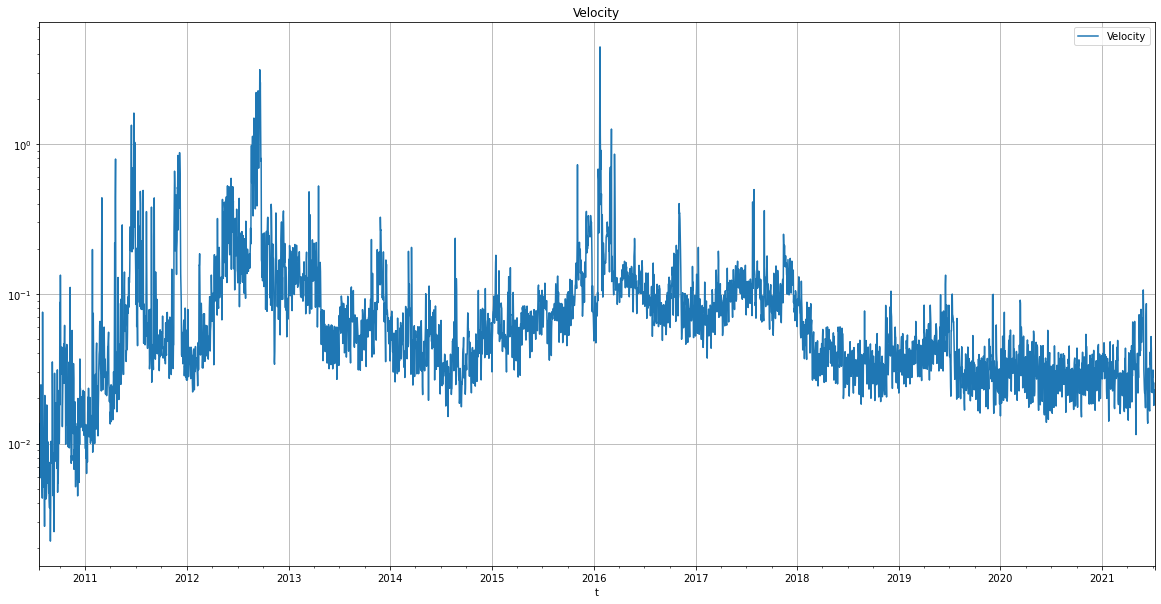

In [17]:
velocity_df.plot(figsize=(20,10), grid=True, logy=True, title='Velocity')

In [18]:
## Extract transaction count data

In [19]:
transaction_count= requests.get('https://api.glassnode.com/v1/metrics/transactions/count', params={'a': coin, 'api_key': API_KEY})

In [20]:
transaction_count_df = pd.read_json(transaction_count.text, convert_dates=['t'])
transaction_count_df.set_index('t', inplace=True)
transaction_count_df = transaction_count_df.rename(columns={'v':'Transaction Count'})
transaction_count_df

Transaction Count
t                            
2009-01-03                  0
2009-01-04                  0
2009-01-05                  0
2009-01-06                  0
2009-01-07                  0
...                       ...
2021-07-04             171735
2021-07-05             223628
2021-07-06             228137
2021-07-07             221104
2021-07-08             230580

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Transaction Count'}, xlabel='t'>

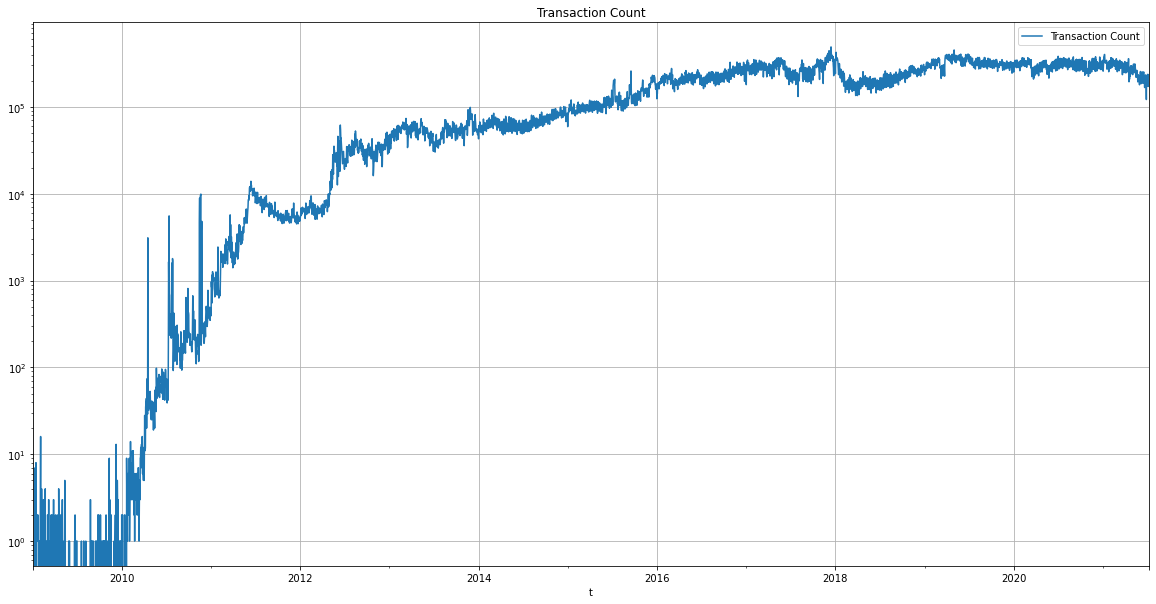

In [21]:
transaction_count_df.plot(figsize=(20,10), grid=True, logy=True, title='Transaction Count')

In [22]:
### Build Level-3-Dataframe: Usage

In [23]:
usage_df_l3 = pd.concat([active_address_df,total_transfer_volume_df,velocity_df,transaction_count_df],axis=1).dropna()
usage_df_l3

Active Address  Total Transfer Volume  Velocity  Transaction Count
t                                                                             
2010-07-18             757           3.606926e+04  0.010432                248
2010-07-19             808           4.714966e+04  0.013640                354
2010-07-20             728           2.990234e+04  0.008629                413
2010-07-21             621           2.765454e+04  0.007955                256
2010-07-22             427           3.963162e+04  0.011374                221
...                    ...                    ...       ...                ...
2021-07-04          850487           1.586243e+06  0.025518             171735
2021-07-05          920363           1.439888e+06  0.017975             223628
2021-07-06          838259           1.332011e+06  0.020433             228137
2021-07-07          812872           1.324880e+06  0.022266             221104
2021-07-08          800764           3.250505e+06  0.022810             230580

[4009 rows x 4 columns]

In [24]:
#### Evaluate correlation among columns

In [25]:
usage_df_l3.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142395 -0.154810   
Total Transfer Volume        0.142395               1.000000  0.884556   
Velocity                    -0.154810               0.884556  1.000000   
Transaction Count            0.943202               0.162543 -0.130689   

                       Transaction Count  
Active Address                  0.943202  
Total Transfer Volume           0.162543  
Velocity                       -0.130689  
Transaction Count               1.000000

In [26]:
### Drop Transaction Count due to high correlation with Active Address.

In [27]:
usage_df_l3 = usage_df_l3.drop(columns='Transaction Count')
usage_df_l3

Active Address  Total Transfer Volume  Velocity
t                                                          
2010-07-18             757           3.606926e+04  0.010432
2010-07-19             808           4.714966e+04  0.013640
2010-07-20             728           2.990234e+04  0.008629
2010-07-21             621           2.765454e+04  0.007955
2010-07-22             427           3.963162e+04  0.011374
...                    ...                    ...       ...
2021-07-04          850487           1.586243e+06  0.025518
2021-07-05          920363           1.439888e+06  0.017975
2021-07-06          838259           1.332011e+06  0.020433
2021-07-07          812872           1.324880e+06  0.022266
2021-07-08          800764           3.250505e+06  0.022810

[4009 rows x 3 columns]

In [28]:
## Extract circulating supply data

In [29]:
circulating_supply= requests.get('https://api.glassnode.com/v1/metrics/supply/current', params={'a': coin, 'api_key': API_KEY})

In [30]:
circulating_supply_df = pd.read_json(circulating_supply.text, convert_dates=['t'])
circulating_supply_df.set_index('t', inplace=True)
circulating_supply_df = circulating_supply_df.rename(columns={'v':'Circulating Supply'})
circulating_supply_df

Circulating Supply
t                             
2009-01-03               50.00
2009-01-04               50.00
2009-01-05               50.00
2009-01-06               50.00
2009-01-07               50.00
...                        ...
2021-07-04         18748031.25
2021-07-05         18748856.25
2021-07-06         18749743.75
2021-07-07         18750512.50
2021-07-08         18751381.25

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Circulating Supply'}, xlabel='t'>

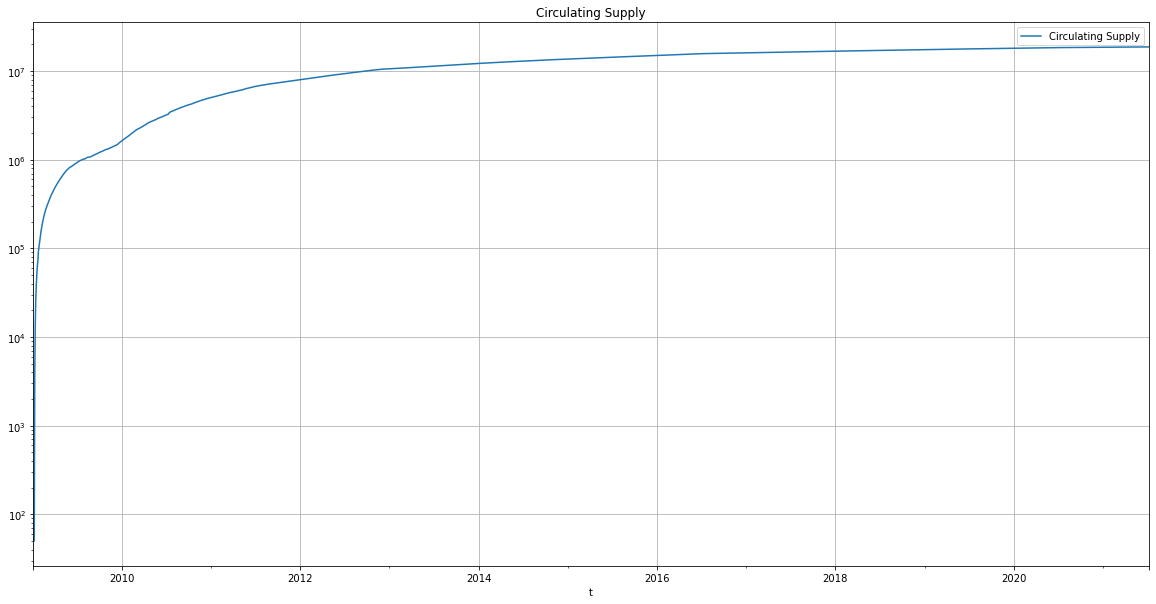

In [31]:
circulating_supply_df.plot(figsize=(20,10), grid=True, logy=True, title='Circulating Supply')

In [32]:
## Extract issuance data

In [33]:
issuance = requests.get('https://api.glassnode.com/v1/metrics/supply/issued', params={'a': coin, 'api_key': API_KEY})

In [34]:
issuance_df = pd.read_json(issuance.text, convert_dates=['t'])
issuance_df.set_index('t', inplace=True)
issuance_df = issuance_df.rename(columns={'v':'Issuance'})
issuance_df

Issuance
t                   
2009-01-03     50.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
2009-01-07      0.00
...              ...
2021-07-04    718.75
2021-07-05    825.00
2021-07-06    887.50
2021-07-07    768.75
2021-07-08    868.75

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Issuance'}, xlabel='t'>

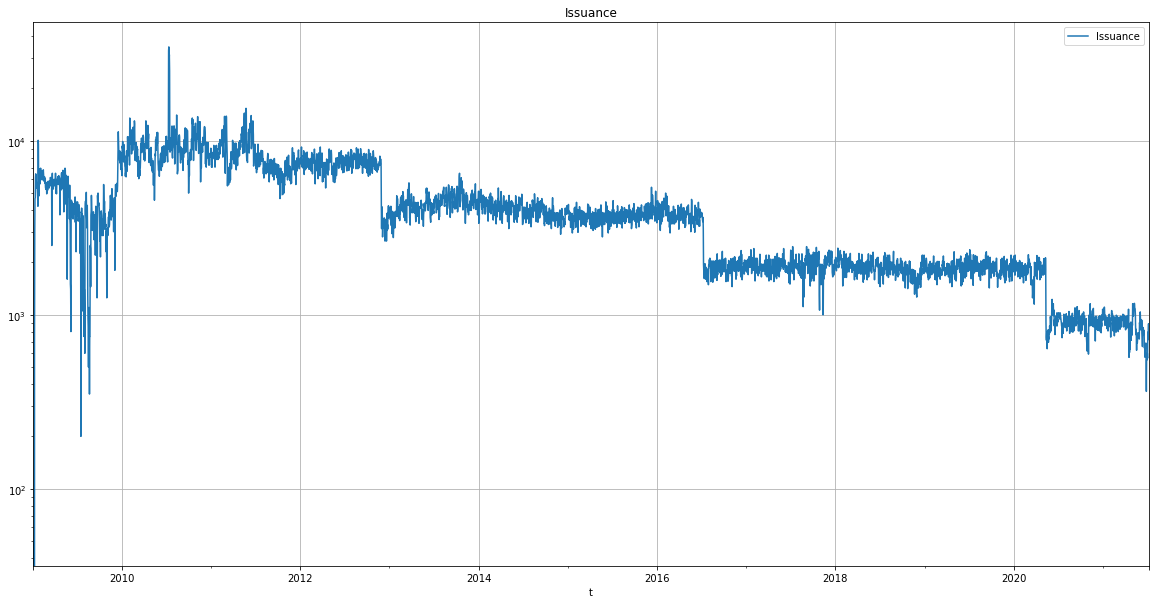

In [35]:
issuance_df.plot(figsize=(20,10), grid=True, logy=True, title='Issuance')

In [36]:
### Build Level-3-Dataframe: monetary_integrity_df_l3

In [37]:
monetary_integrity_df_l3 = pd.concat([circulating_supply_df,issuance_df],axis=1).dropna()
monetary_integrity_df_l3

Circulating Supply  Issuance
t                                       
2009-01-03               50.00     50.00
2009-01-04               50.00      0.00
2009-01-05               50.00      0.00
2009-01-06               50.00      0.00
2009-01-07               50.00      0.00
...                        ...       ...
2021-07-04         18748031.25    718.75
2021-07-05         18748856.25    825.00
2021-07-06         18749743.75    887.50
2021-07-07         18750512.50    768.75
2021-07-08         18751381.25    868.75

[4570 rows x 2 columns]

In [38]:
monetary_integrity_df_l3.corr()

Circulating Supply  Issuance
Circulating Supply            1.000000 -0.736299
Issuance                     -0.736299  1.000000

In [39]:
## Extract hash rate data

In [40]:
#hash_rate = requests.get('https://api.glassnode.com/v1/metrics/mining/hash_rate_mean', params={'a': coin, 'api_key': API_KEY})

In [41]:
# import json
# pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)
# hash_rate_df = json.loads(hash_rate.text)
# hash_rate_df = pd.DataFrame(hash_rate_df)
# hash_rate_df = hash_rate_df.set_index('t')
# hash_rate_df.index = pd.to_datetime(hash_rate_df.index, unit='s')
# hash_rate_df = hash_rate_df.rename(columns={'v':'Hash Rate'})
# hash_rate_df

In [42]:
#hash_rate_df.loc[hash_rate_df['Hash Rate']==hash_rate_df['Hash Rate'].max()]

In [43]:
#type(hash_rate_df.iloc[0,0])

In [44]:
#hash_rate_df = hash_rate_df[:'2021-08-01']

In [45]:
#hash_rate_df.dtypes

# hash_rate_df['Hash Rate'] = hash_rate_df["Hash Rate"].astype('int64')

In [46]:
#hash_rate_df.plot(y='Hash Rate',figsize=(20,10), grid=True, logy=True, title='Hash Rate')

In [47]:
## Extract miner revenue data

In [48]:
#import json
#pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)

In [49]:
## Extract Miner Revenue data

In [50]:
miner_revenue = requests.get('https://api.glassnode.com/v1/metrics/mining/revenue_sum', params={'a': coin, 'api_key': API_KEY})

In [51]:
miner_revenue_df = pd.read_json(miner_revenue.text, convert_dates=['t'])
miner_revenue_df.set_index('t', inplace=True)
miner_revenue_df = miner_revenue_df.rename(columns={'v':'Miner Revenue'})
miner_revenue_df

Miner Revenue
t                        
2009-01-03      50.000000
2009-01-04       0.000000
2009-01-05       0.000000
2009-01-06       0.000000
2009-01-07       0.000000
...                   ...
2021-07-04     762.180650
2021-07-05     872.545607
2021-07-06     934.574453
2021-07-07     806.598127
2021-07-08     898.027984

[4570 rows x 1 columns]

<AxesSubplot:title={'center':'Miner Revenue'}, xlabel='t'>

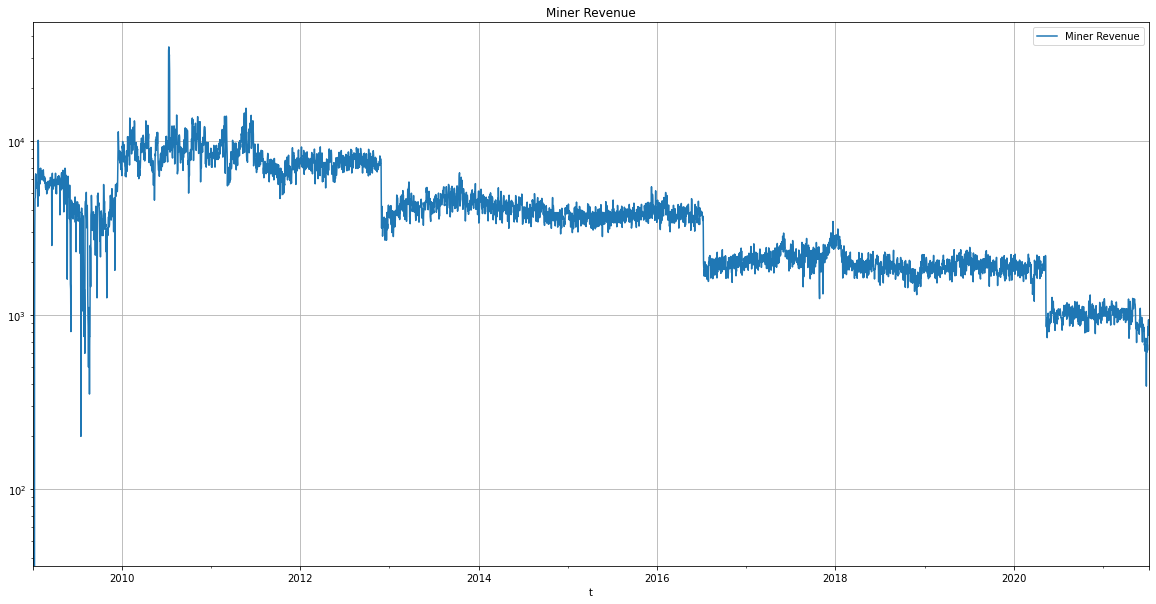

In [52]:
miner_revenue_df.plot(figsize=(20,10), grid=True, logy=True, title='Miner Revenue')

In [53]:
## Extract difficulty data

In [54]:
difficulty = requests.get('https://api.glassnode.com/v1/metrics/indicators/difficulty_ribbon_compression', params={'a': coin, 'api_key': API_KEY})

In [55]:
difficulty_df = pd.read_json(difficulty.text, convert_dates=['t'])
difficulty_df.set_index('t', inplace=True)
difficulty_df = difficulty_df.rename(columns={'v':'Difficulty'})
difficulty_df

Difficulty
t                     
2009-07-28    0.000000
2009-07-29    0.000000
2009-07-30    0.000000
2009-07-31    0.000000
2009-08-01    0.000000
...                ...
2021-07-04    0.059414
2021-07-05    0.068791
2021-07-06    0.078526
2021-07-07    0.088585
2021-07-08    0.098761

[4364 rows x 1 columns]

<AxesSubplot:title={'center':'Difficulty'}, xlabel='t'>

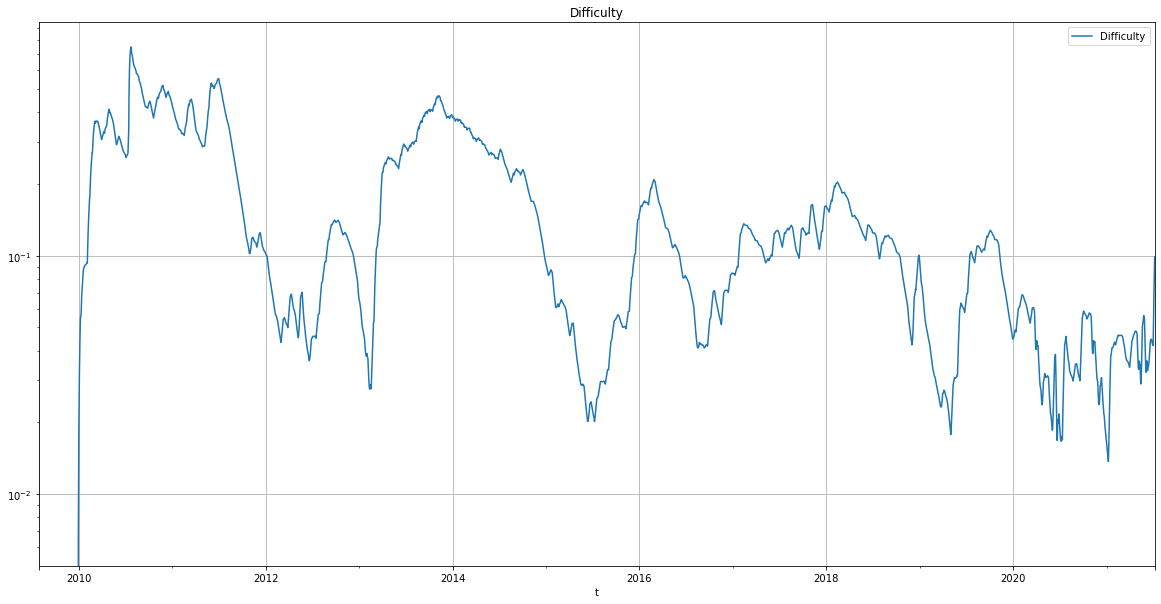

In [56]:
difficulty_df.plot(figsize=(20,10), grid=True, logy=True, title='Difficulty')

In [57]:
## Extract Thrermocap data

In [58]:
thermocap = requests.get('https://api.glassnode.com/v1/metrics/mining/thermocap', params={'a': coin, 'api_key': API_KEY})

In [59]:
thermocap_df = pd.read_json(thermocap.text, convert_dates=['t'])
thermocap_df.set_index('t', inplace=True)
thermocap_df = thermocap_df.rename(columns={'v':'Thermocap'})
thermocap_df

Thermocap
t                       
2010-07-18  1.708201e+05
2010-07-19  1.716100e+05
2010-07-20  1.723301e+05
2010-07-21  1.730580e+05
2010-07-22  1.736565e+05
...                  ...
2021-07-04  2.721879e+10
2021-07-05  2.724693e+10
2021-07-06  2.727725e+10
2021-07-07  2.730382e+10
2021-07-08  2.733241e+10

[4009 rows x 1 columns]

<AxesSubplot:title={'center':'Thermocap'}, xlabel='t'>

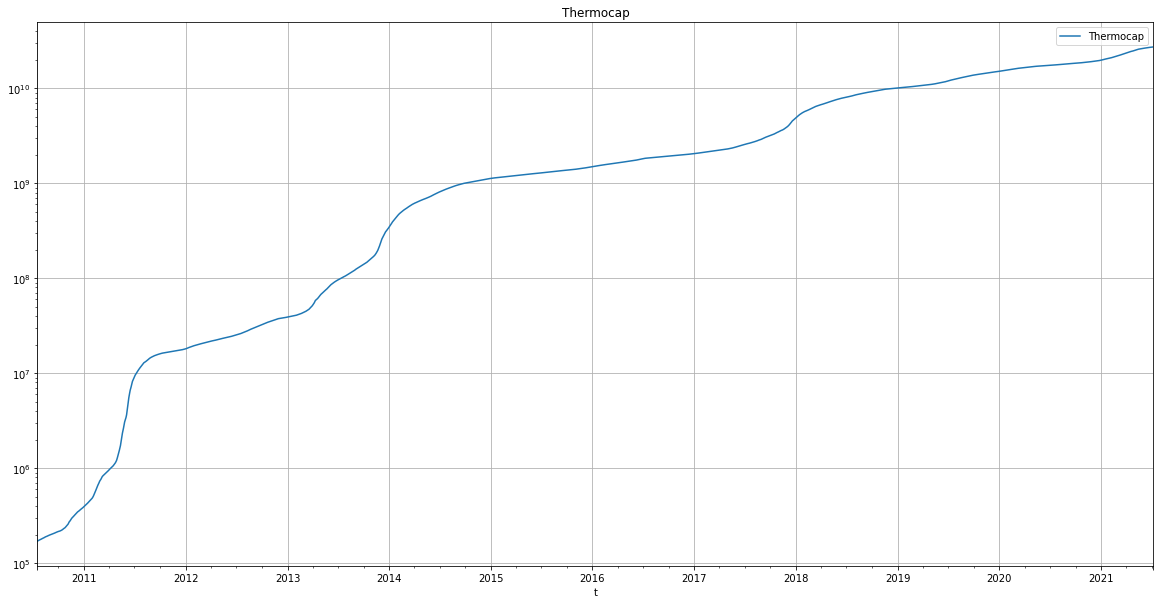

In [60]:
thermocap_df.plot(figsize=(20,10), grid=True, logy=True, title='Thermocap')

In [61]:
### Build Level-3-Dataframe: security_df_l3

In [62]:
security_df_l3 = pd.concat([miner_revenue_df,difficulty_df, thermocap_df],axis=1).dropna()
security_df_l3

Miner Revenue  Difficulty     Thermocap
t                                                  
2010-07-18    8600.830000    0.608607  1.708201e+05
2010-07-19    8700.090000    0.652693  1.716100e+05
2010-07-20    9050.000000    0.686378  1.723301e+05
2010-07-21   10350.000000    0.713103  1.730580e+05
2010-07-22    8800.000000    0.728067  1.736565e+05
...                   ...         ...           ...
2021-07-04     762.180650    0.059414  2.721879e+10
2021-07-05     872.545607    0.068791  2.724693e+10
2021-07-06     934.574453    0.078526  2.727725e+10
2021-07-07     806.598127    0.088585  2.730382e+10
2021-07-08     898.027984    0.098761  2.733241e+10

[4009 rows x 3 columns]

In [63]:
security_df_l3.corr()

Miner Revenue  Difficulty  Thermocap
Miner Revenue       1.000000    0.615052  -0.633558
Difficulty          0.615052    1.000000  -0.461164
Thermocap          -0.633558   -0.461164   1.000000

In [64]:
# Build the second of three Level-2-Dataframes: Network Health

In [65]:
network_health_df_l2 = pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()

In [66]:
network_health_df_l2

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2010-07-18           757.0           3.606926e+04  0.010432   
2010-07-19           808.0           4.714966e+04  0.013640   
2010-07-20           728.0           2.990234e+04  0.008629   
2010-07-21           621.0           2.765454e+04  0.007955   
2010-07-22           427.0           3.963162e+04  0.011374   
...                    ...                    ...       ...   
2021-07-04        850487.0           1.586243e+06  0.025518   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   

            Circulating Supply  Issuance  Miner Revenue  Difficulty  \
t                                                                     
2010-07-18          3447600.00   8600.00    8600.830000    0.608607   
2010-07-19          3456300.00   8700.00    8700.090000    0.652693   
2010-07-20          3465350.00   9050.00    9050.000000    0.686378   
2010-07-21          3475700.00  10350.00   10350.000000    0.713103   
2010-07-22          3484500.00   8800.00    8800.000000    0.728067   
...                        ...       ...            ...         ...   
2021-07-04         18748031.25    718.75     762.180650    0.059414   
2021-07-05         18748856.25    825.00     872.545607    0.068791   
2021-07-06         18749743.75    887.50     934.574453    0.078526   
2021-07-07         18750512.50    768.75     806.598127    0.088585   
2021-07-08         18751381.25    868.75     898.027984    0.098761   

               Thermocap  
t                         
2010-07-18  1.708201e+05  
2010-07-19  1.716100e+05  
2010-07-20  1.723301e+05  
2010-07-21  1.730580e+05  
2010-07-22  1.736565e+05  
...                  ...  
2021-07-04  2.721879e+10  
2021-07-05  2.724693e+10  
2021-07-06  2.727725e+10  
2021-07-07  2.730382e+10  
2021-07-08  2.733241e+10  

[4009 rows x 8 columns]

In [67]:
network_health_df_l2.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142395 -0.154810   
Total Transfer Volume        0.142395               1.000000  0.884556   
Velocity                    -0.154810               0.884556  1.000000   
Circulating Supply           0.878584               0.143478 -0.135848   
Issuance                    -0.810956              -0.086949  0.187239   
Miner Revenue               -0.801694              -0.081235  0.190080   
Difficulty                  -0.546489              -0.174658 -0.014249   
Thermocap                    0.803791               0.001561 -0.204740   

                       Circulating Supply  Issuance  Miner Revenue  \
Active Address                   0.878584 -0.810956      -0.801694   
Total Transfer Volume            0.143478 -0.086949      -0.081235   
Velocity                        -0.135848  0.187239       0.190080   
Circulating Supply               1.000000 -0.934499      -0.933420   
Issuance                        -0.934499  1.000000       0.999319   
Miner Revenue                   -0.933420  0.999319       1.000000   
Difficulty                      -0.670965  0.613804       0.615052   
Thermocap                        0.700367 -0.630156      -0.633558   

                       Difficulty  Thermocap  
Active Address          -0.546489   0.803791  
Total Transfer Volume   -0.174658   0.001561  
Velocity                -0.014249  -0.204740  
Circulating Supply      -0.670965   0.700367  
Issuance                 0.613804  -0.630156  
Miner Revenue            0.615052  -0.633558  
Difficulty               1.000000  -0.461164  
Thermocap               -0.461164   1.000000

In [68]:
# Due to the high correlation between Issuance and Miner Revenue, drop Miner Revenue from security_df_l3

In [69]:
security_df_l3=security_df_l3.drop(columns='Miner Revenue')

In [70]:
security_df_l3

Difficulty     Thermocap
t                                   
2010-07-18    0.608607  1.708201e+05
2010-07-19    0.652693  1.716100e+05
2010-07-20    0.686378  1.723301e+05
2010-07-21    0.713103  1.730580e+05
2010-07-22    0.728067  1.736565e+05
...                ...           ...
2021-07-04    0.059414  2.721879e+10
2021-07-05    0.068791  2.724693e+10
2021-07-06    0.078526  2.727725e+10
2021-07-07    0.088585  2.730382e+10
2021-07-08    0.098761  2.733241e+10

[4009 rows x 2 columns]

In [71]:
network_health_df_l2= pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()
network_health_df_l2.corr()

Active Address  Total Transfer Volume  Velocity  \
Active Address               1.000000               0.142395 -0.154810   
Total Transfer Volume        0.142395               1.000000  0.884556   
Velocity                    -0.154810               0.884556  1.000000   
Circulating Supply           0.878584               0.143478 -0.135848   
Issuance                    -0.810956              -0.086949  0.187239   
Difficulty                  -0.546489              -0.174658 -0.014249   
Thermocap                    0.803791               0.001561 -0.204740   

                       Circulating Supply  Issuance  Difficulty  Thermocap  
Active Address                   0.878584 -0.810956   -0.546489   0.803791  
Total Transfer Volume            0.143478 -0.086949   -0.174658   0.001561  
Velocity                        -0.135848  0.187239   -0.014249  -0.204740  
Circulating Supply               1.000000 -0.934499   -0.670965   0.700367  
Issuance                        -0.934499  1.000000    0.613804  -0.630156  
Difficulty                      -0.670965  0.613804    1.000000  -0.461164  
Thermocap                        0.700367 -0.630156   -0.461164   1.000000

In [72]:
# Use heat map to visualize correlation
network_health_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=700,
    height=500
)

:HeatMap   [columns,index]   (value)

In [73]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [74]:
## Extract Miner Unspent Supply (UTXO)

In [75]:
utxo = requests.get('https://api.glassnode.com/v1/metrics/mining/miners_unspent_supply', params={'a': coin, 'api_key': API_KEY})

In [76]:
utxo_df = pd.read_json(utxo.text, convert_dates=['t'])
utxo_df.set_index('t', inplace=True)
utxo_df = utxo_df.rename(columns={'v':'UTXO'})
utxo_df

UTXO
t                       
2009-01-03  5.000000e+01
2009-01-04  5.000000e+01
2009-01-05  5.000000e+01
2009-01-06  5.000000e+01
2009-01-07  5.000000e+01
...                  ...
2020-07-04  1.765388e+06
2020-07-05  1.765754e+06
2020-07-06  1.765835e+06
2020-07-07  1.765756e+06
2020-07-08  1.765617e+06

[4205 rows x 1 columns]

In [77]:
## Extract Coin Years Destroyed (CYD)  

In [78]:
cyd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cyd', params={'a': coin, 'api_key': API_KEY})

In [79]:
cyd_df = pd.read_json(cyd.text, convert_dates=['t'])
cyd_df.set_index('t', inplace=True)
cyd_df = cyd_df.rename(columns={'v':'CYD'})
cyd_df

CYD
t                       
2010-01-11  3.461755e+06
2010-01-12  3.943371e+06
2010-01-13  3.943582e+06
2010-01-14  3.949321e+06
2010-01-15  3.949512e+06
...                  ...
2021-07-04  4.571374e+09
2021-07-05  4.574433e+09
2021-07-06  4.573218e+09
2021-07-07  4.571468e+09
2021-07-08  4.560950e+09

[4197 rows x 1 columns]

In [80]:
## Net Unrealized Profit & Losses (NUPL) 

In [81]:
nupl = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [82]:
nupl_df = pd.read_json(nupl.text, convert_dates=['t'])
nupl_df.set_index('t', inplace=True)
nupl_df = nupl_df.rename(columns={'v':'NUPL'})
nupl_df

NUPL
t                   
2010-07-18  0.421756
2010-07-19  0.380821
2010-07-20  0.328775
2010-07-21  0.365481
2010-07-22  0.102038
...              ...
2021-07-04  0.451348
2021-07-05  0.427749
2021-07-06  0.433471
2021-07-07  0.428202
2021-07-08  0.411357

[4009 rows x 1 columns]

In [83]:
## Realized Cap (RC) 

In [84]:
rc = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd', params={'a': coin, 'api_key': API_KEY})

In [85]:
rc_df = pd.read_json(rc.text, convert_dates=['t'])
rc_df.set_index('t', inplace=True)
rc_df = rc_df.rename(columns={'v':'Realized Cap'})
rc_df

Realized Cap
t                       
2009-01-03  2.475500e+00
2009-01-04           NaN
2009-01-05           NaN
2009-01-06           NaN
2009-01-07           NaN
...                  ...
2021-07-04  3.628415e+11
2021-07-05  3.627696e+11
2021-07-06  3.627395e+11
2021-07-07  3.628266e+11
2021-07-08  3.624590e+11

[4570 rows x 1 columns]

In [86]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [87]:
buyer_and_seller_behavior_df_l2=pd.concat([utxo_df,cyd_df,nupl_df,rc_df],axis=1).dropna()
buyer_and_seller_behavior_df_l2

UTXO           CYD      NUPL  Realized Cap
t                                                             
2010-07-18  2.382007e+06  5.396822e+07  0.421756  1.711265e+05
2010-07-19  2.379557e+06  5.441558e+07  0.380821  1.729175e+05
2010-07-20  2.383107e+06  5.440775e+07  0.328775  1.738318e+05
2010-07-21  2.381757e+06  5.530445e+07  0.365481  1.746896e+05
2010-07-22  2.387157e+06  5.557529e+07  0.102038  1.750491e+05
...                  ...           ...       ...           ...
2020-07-04  1.765388e+06  3.072421e+09  0.359855  1.073903e+11
2020-07-05  1.765754e+06  3.071930e+09  0.357381  1.073967e+11
2020-07-06  1.765835e+06  3.073557e+09  0.372642  1.074412e+11
2020-07-07  1.765756e+06  3.072857e+09  0.369753  1.074773e+11
2020-07-08  1.765617e+06  3.077731e+09  0.380346  1.076240e+11

[3644 rows x 4 columns]

In [88]:
buyer_and_seller_behavior_df_l2.corr()

UTXO       CYD      NUPL  Realized Cap
UTXO          1.000000 -0.760588  0.097382     -0.571734
CYD          -0.760588  1.000000  0.140377      0.757203
NUPL          0.097382  0.140377  1.000000     -0.019420
Realized Cap -0.571734  0.757203 -0.019420      1.000000

In [89]:
# Use heat map to visualize correlation
buyer_and_seller_behavior_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=400,
    height=300
)

:HeatMap   [columns,index]   (value)

In [90]:
# Build the third of three Level-2-Dataframes: Valuation

In [91]:
## Extact stock-to-flow data

In [92]:
stf = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [93]:
stf_df = pd.read_json(stf.text, convert_dates=['t'])
stf_df.set_index('t', inplace=True)
stf_df = stf_df.rename(columns={'v':'Stock to Flow'})
stf_df

Stock to Flow
t                        
2010-07-18       0.421756
2010-07-19       0.380821
2010-07-20       0.328775
2010-07-21       0.365481
2010-07-22       0.102038
...                   ...
2021-07-04       0.451348
2021-07-05       0.427749
2021-07-06       0.433471
2021-07-07       0.428202
2021-07-08       0.411357

[4009 rows x 1 columns]

<AxesSubplot:title={'center':'Stock to Flow'}, xlabel='t'>

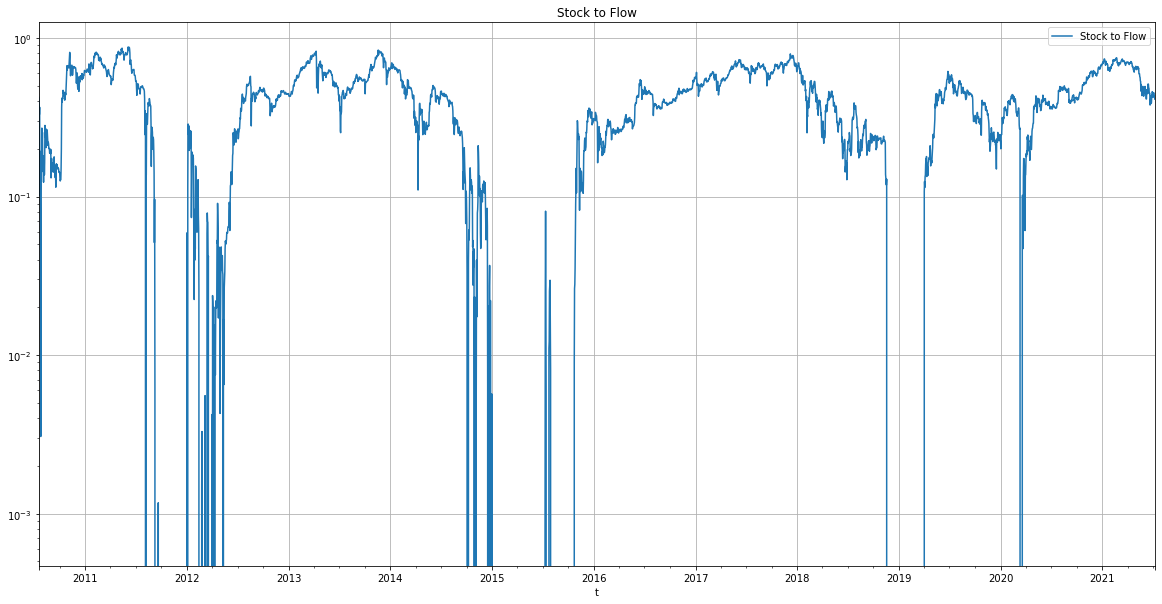

In [94]:
stf_df.plot(figsize=(20,10), grid=True, logy=True, title='Stock to Flow')

In [95]:
## Extract Market Cap to Thermocap Ratio

In [96]:
mcttc = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [97]:
mcttc_df = pd.read_json(mcttc.text, convert_dates=['t'])
mcttc_df.set_index('t', inplace=True)
mcttc_df = mcttc_df.rename(columns={'v':'Market Cap/Thermo Cap'})
mcttc_df

Market Cap/Thermo Cap
t                                
2010-07-18               0.421756
2010-07-19               0.380821
2010-07-20               0.328775
2010-07-21               0.365481
2010-07-22               0.102038
...                           ...
2021-07-04               0.451348
2021-07-05               0.427749
2021-07-06               0.433471
2021-07-07               0.428202
2021-07-08               0.411357

[4009 rows x 1 columns]

<AxesSubplot:title={'center':'Market Cap/Thermo Cap'}, xlabel='t'>

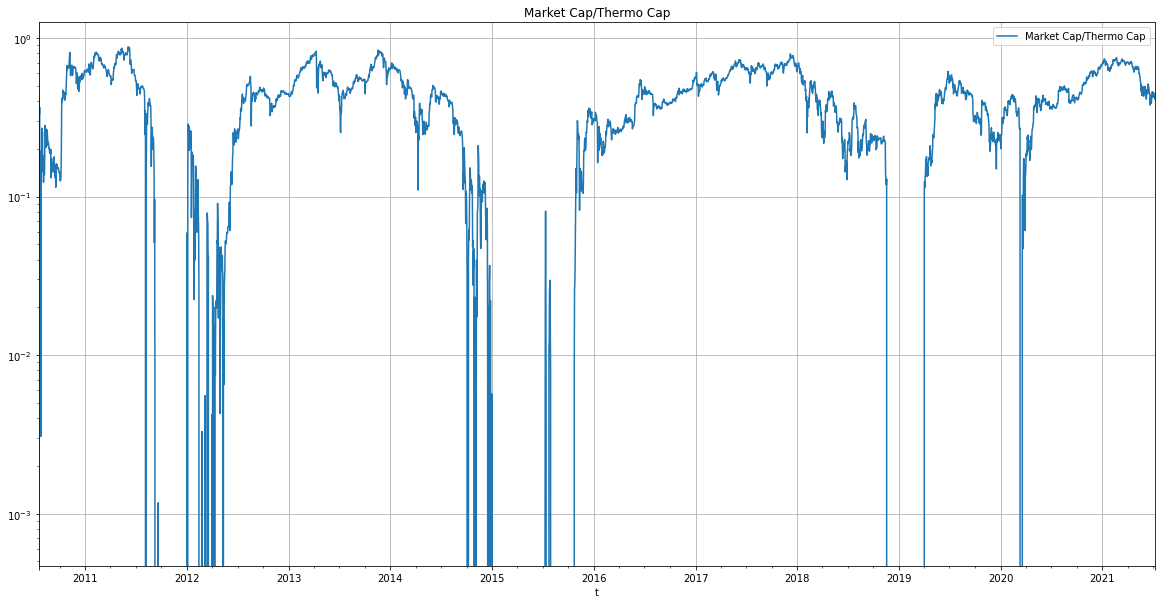

In [98]:
mcttc_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Cap/Thermo Cap')

In [99]:
## Extract SOPR data

In [100]:
sopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr', params={'a': coin, 'api_key': API_KEY})

In [101]:
sopr_df = pd.read_json(sopr.text, convert_dates=['t'])
sopr_df.set_index('t', inplace=True)
sopr_df = sopr_df.rename(columns={'v':'SOPR'})
sopr_df

SOPR
t                   
2010-07-17  1.000000
2010-07-18  1.174760
2010-07-19  1.318536
2010-07-20  1.090517
2010-07-21  1.065532
...              ...
2021-07-04  1.001935
2021-07-05  0.997970
2021-07-06  0.998673
2021-07-07  1.001324
2021-07-08  0.996299

[4010 rows x 1 columns]

<AxesSubplot:title={'center':'SOPR'}, xlabel='t'>

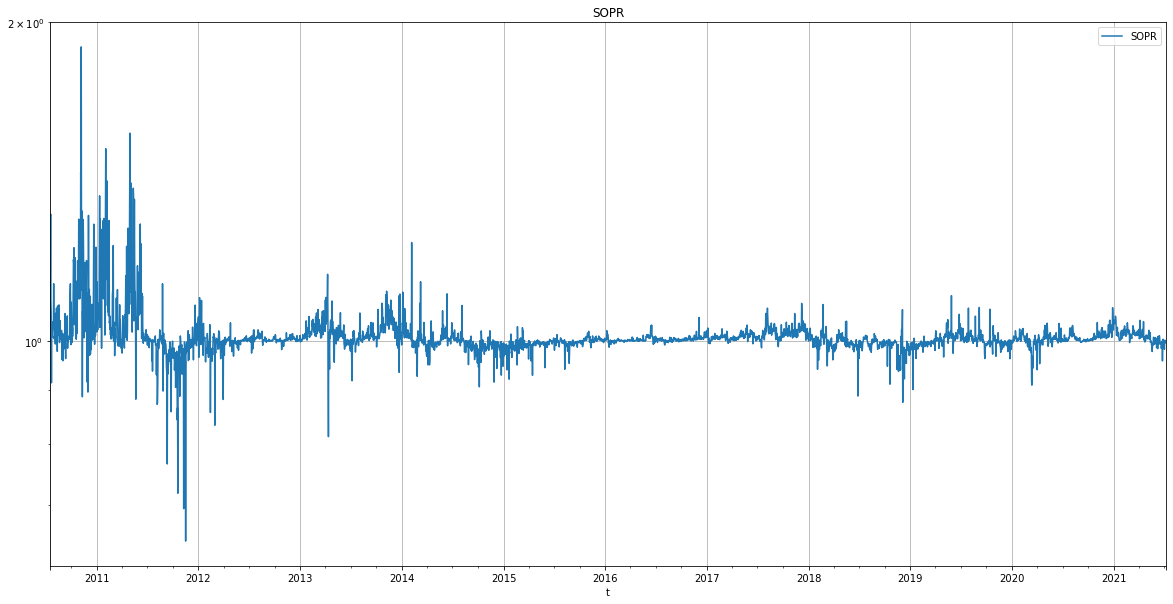

In [102]:
sopr_df.plot(figsize=(20,10), grid=True, logy=True, title='SOPR')

In [103]:
## Extract Futures Perpetual Funding Rates data

In [104]:
fpfr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_funding_rate_perpetual', params={'a': coin, 'api_key': API_KEY})

In [105]:
fpfr_df = pd.read_json(fpfr.text, convert_dates=['t'])
fpfr_df.set_index('t', inplace=True)
fpfr_df = fpfr_df.rename(columns={'v':'Futures Perpetual Funding Rates'})
fpfr_df

Futures Perpetual Funding Rates
t                                          
2021-06-09                        -0.000186
2021-06-10                         0.000029
2021-06-11                         0.000012
2021-06-12                        -0.000065
2021-06-13                         0.000019
2021-06-14                         0.000040
2021-06-15                         0.000047
2021-06-16                        -0.000005
2021-06-17                        -0.000039
2021-06-18                        -0.000077
2021-06-19                        -0.000060
2021-06-20                        -0.000157
2021-06-21                        -0.000141
2021-06-22                        -0.000208
2021-06-23                        -0.000140
2021-06-24                        -0.000133
2021-06-25                        -0.000119
2021-06-26                        -0.000193
2021-06-27                        -0.000150
2021-06-28                         0.000049
2021-06-29                        -0.000024
2021-06-30                        -0.000045
2021-07-01                        -0.000085
2021-07-02                        -0.000068
2021-07-03                        -0.000022
2021-07-04                         0.000004
2021-07-05                        -0.000166
2021-07-06                        -0.000119
2021-07-07                        -0.000009
2021-07-08                        -0.000068

<AxesSubplot:title={'center':'Futures Perpetual Funding Rates'}, xlabel='t'>

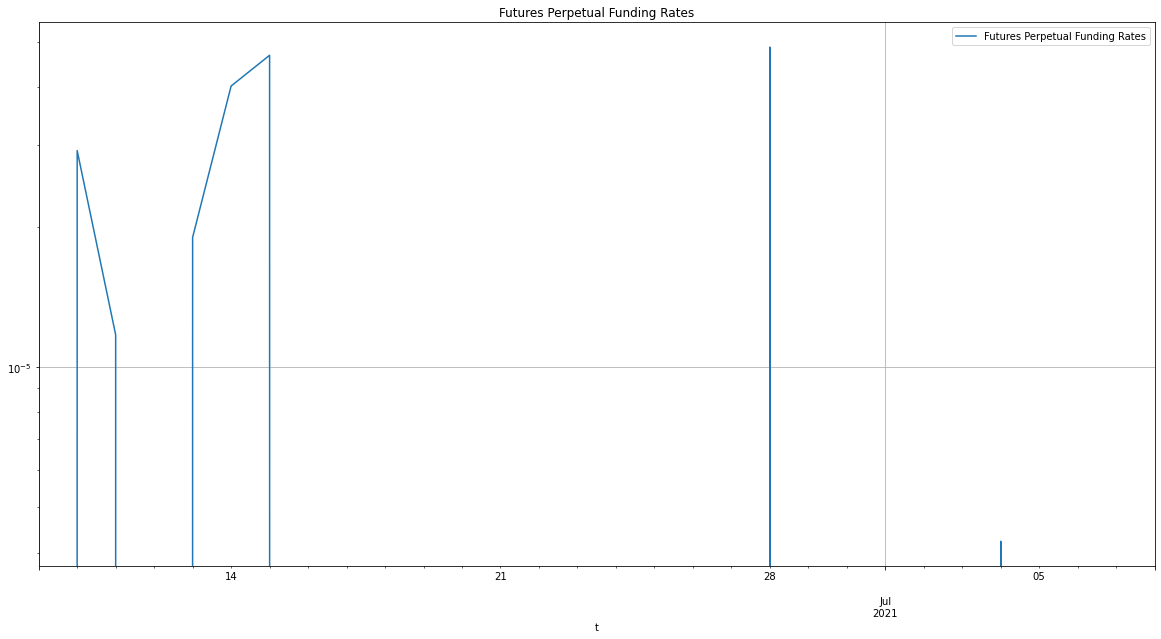

In [106]:
fpfr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Perpetual Funding Rates')

In [107]:
## Extract Futures Estimated Leverage Ratio

In [108]:
felr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [109]:
felr_df = pd.read_json(felr.text, convert_dates=['t'])
felr_df.set_index('t', inplace=True)
felr_df = felr_df.rename(columns={'v':'Futures Estimated Leverage Ratio'})
felr_df

Futures Estimated Leverage Ratio
t                                           
2020-05-15                          0.166281
2020-05-16                          0.165119
2020-05-17                          0.170652
2020-05-18                          0.167470
2020-05-19                          0.166283
...                                      ...
2021-07-04                          0.155227
2021-07-05                          0.157663
2021-07-06                          0.156227
2021-07-07                          0.158110
2021-07-08                          0.164848

[420 rows x 1 columns]

<AxesSubplot:title={'center':'Futures Estimated Leverage Ratio'}, xlabel='t'>

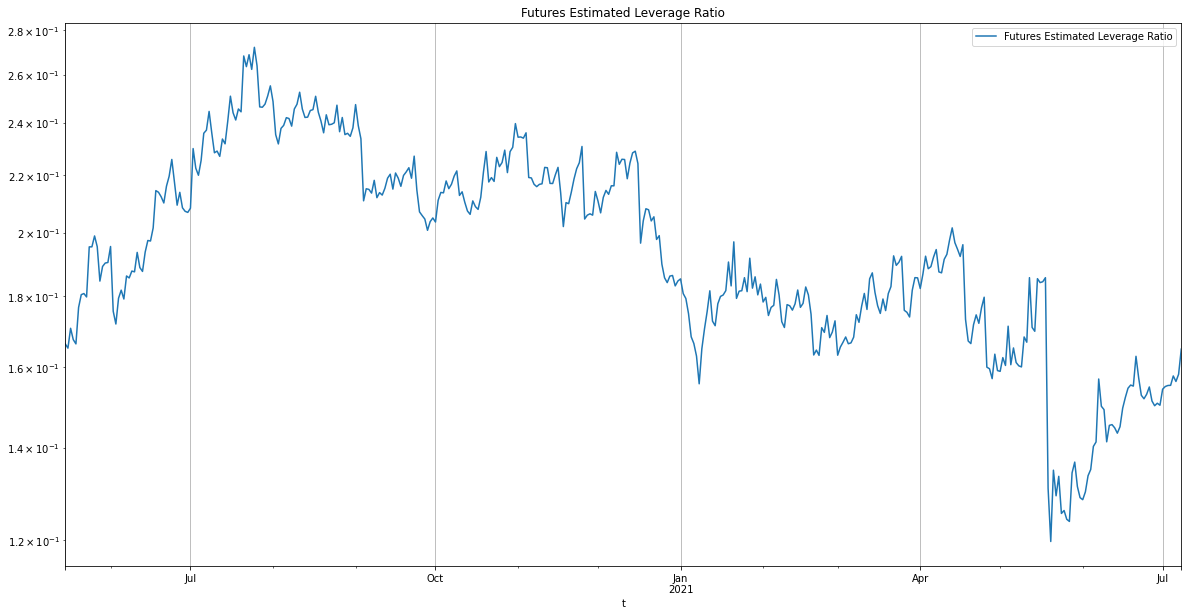

In [110]:
felr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Estimated Leverage Ratio')

In [111]:
## Extract MVRV Ratio

In [112]:
mvrv = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [113]:
mvrv_df = pd.read_json(mvrv.text, convert_dates=['t'])
mvrv_df.set_index('t', inplace=True)
mvrv_df = mvrv_df.rename(columns={'v':'Market Value/Realized Value'})
mvrv_df

Market Value/Realized Value
t                                      
2020-05-15                     0.166281
2020-05-16                     0.165119
2020-05-17                     0.170652
2020-05-18                     0.167470
2020-05-19                     0.166283
...                                 ...
2021-07-04                     0.155227
2021-07-05                     0.157663
2021-07-06                     0.156227
2021-07-07                     0.158110
2021-07-08                     0.164848

[420 rows x 1 columns]

<AxesSubplot:title={'center':'Market Value to Realized Value Ratio'}, xlabel='t'>

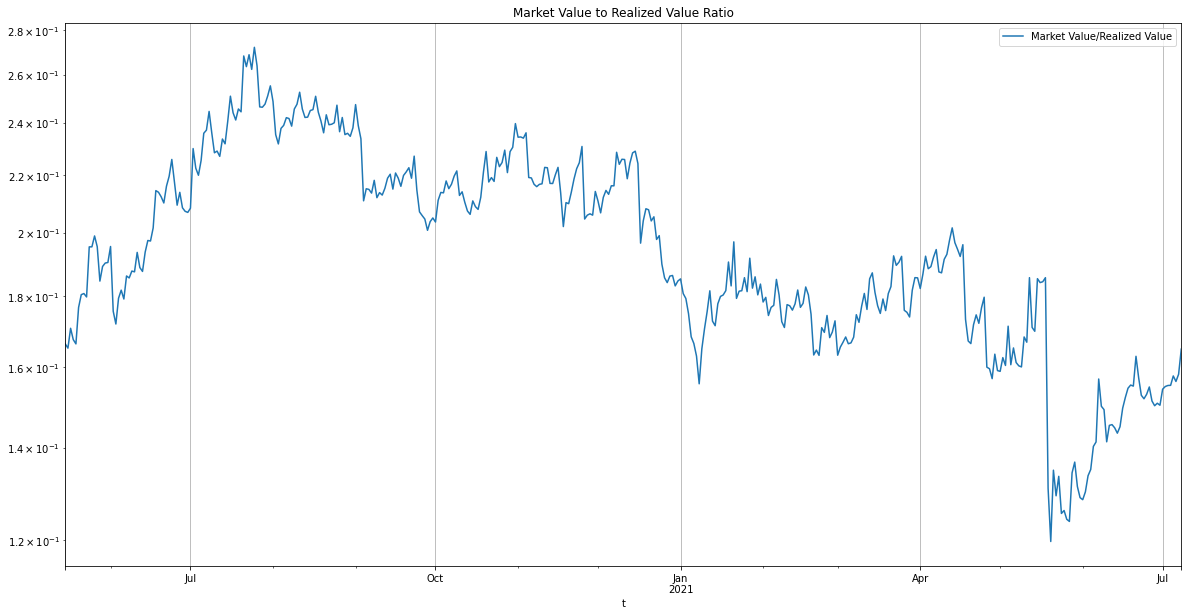

In [114]:
mvrv_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Value to Realized Value Ratio')

In [115]:
## Extract Puell Multiple

In [116]:
puell = requests.get('https://api.glassnode.com/v1/metrics/indicators/puell_multiple', params={'a': coin, 'api_key': API_KEY})

In [117]:
puell_df = pd.read_json(puell.text, convert_dates=['t'])
puell_df.set_index('t', inplace=True)
puell_df = puell_df.rename(columns={'v':'Puell Multiple'})
puell_df

Puell Multiple
t                         
2011-07-16        3.656330
2011-07-17        3.830945
2011-07-18        3.691357
2011-07-19        3.244558
2011-07-20        3.366804
...                    ...
2021-07-04        0.954134
2021-07-05        1.058615
2021-07-06        1.137611
2021-07-07        0.994784
2021-07-08        1.068654

[3646 rows x 1 columns]

<AxesSubplot:title={'center':'Puell Multiple'}, xlabel='t'>

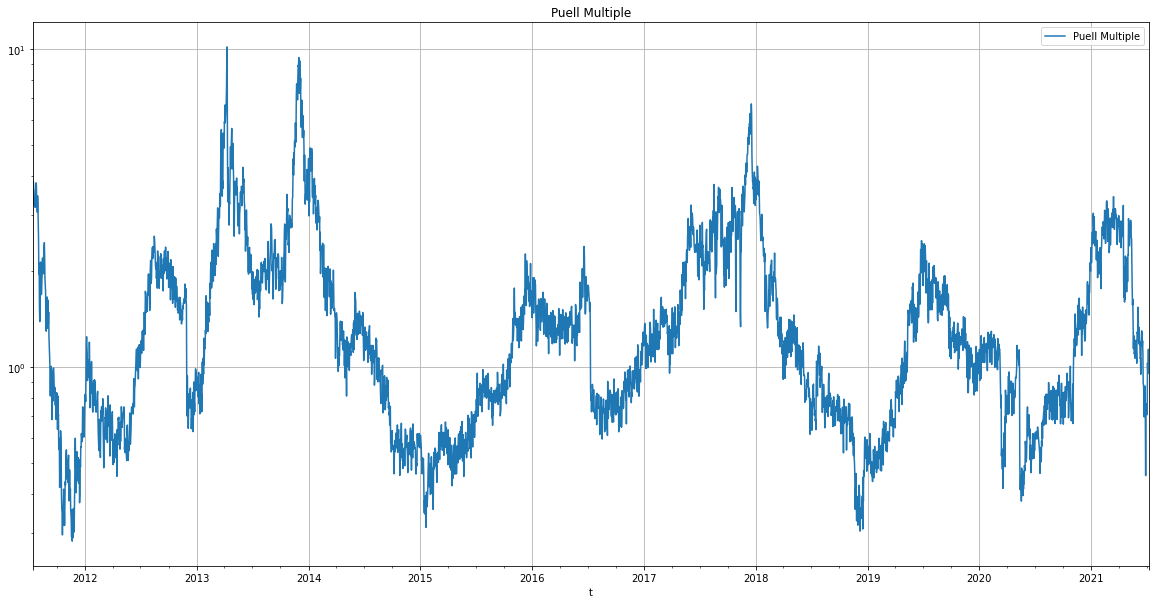

In [118]:
puell_df.plot(figsize=(20,10), grid=True, logy=True, title='Puell Multiple')

In [119]:
## Extract Stablecoin Supply Ratio (SSR) Oscillator

In [120]:
ssro = requests.get('https://api.glassnode.com/v1/metrics/indicators/ssr_oscillator', params={'a': coin, 'api_key': API_KEY})

In [121]:
ssro_df = pd.read_json(ssro.text, convert_dates=['t'])
ssro_df.set_index('t', inplace=True)
ssro_df = ssro_df.rename(columns={'v':'Stablecoin Supply Ratio (SSR) Oscillator'})
ssro_df

Stablecoin Supply Ratio (SSR) Oscillator
t                                                   
2018-09-04                                 -0.833493
2018-09-05                                 -0.887271
2018-09-06                                 -1.171063
2018-09-07                                 -1.163901
2018-09-08                                 -1.198452
...                                              ...
2021-07-04                                 -1.663843
2021-07-05                                 -1.681967
2021-07-06                                 -1.659758
2021-07-07                                 -1.629375
2021-07-08                                 -1.662471

[1039 rows x 1 columns]

<AxesSubplot:title={'center':'Stablecoin Supply Ratio (SSR) Oscillator'}, xlabel='t'>

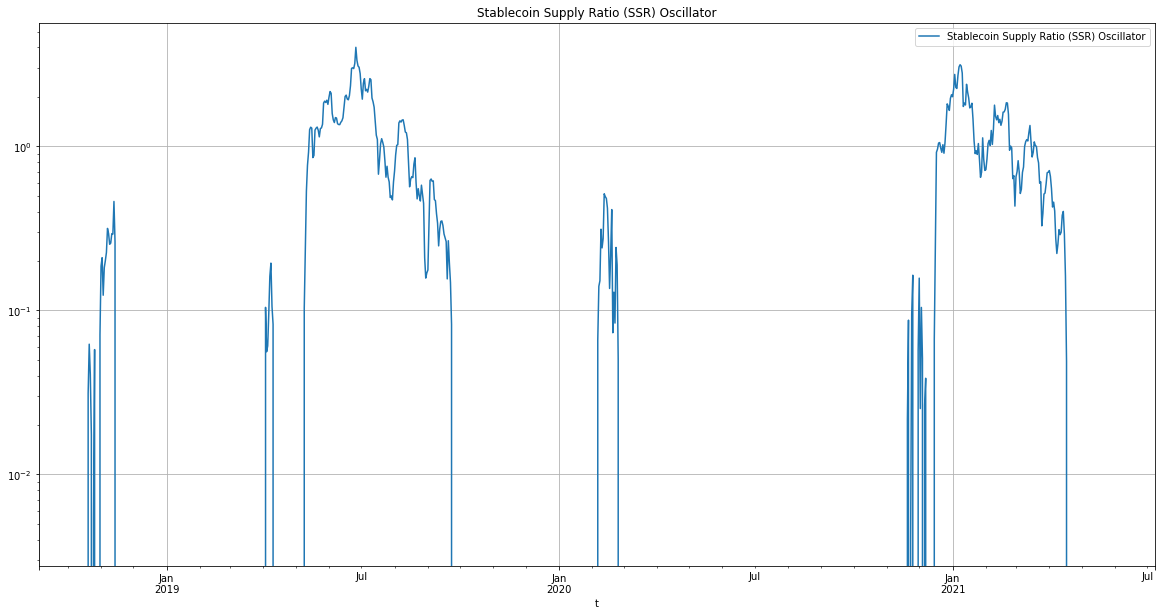

In [122]:
ssro_df.plot(figsize=(20,10), grid=True, logy=True, title='Stablecoin Supply Ratio (SSR) Oscillator')

In [123]:
## Extract Exchange Net Position Change

In [124]:
enpc = requests.get('https://api.glassnode.com/v1/metrics/distribution/exchange_net_position_change', params={'a': coin, 'api_key': API_KEY})

In [125]:
enpc_df = pd.read_json(enpc.text, convert_dates=['t'])
enpc_df.set_index('t', inplace=True)
enpc_df = enpc_df.rename(columns={'v':'Exchange Net Position Change'})
enpc_df

Exchange Net Position Change
t                                       
2011-09-16                     74.789093
2011-09-17                     69.740065
2011-09-18                     30.148647
2011-09-19                     38.196675
2011-09-20                     36.377675
...                                  ...
2021-07-04                 -18860.126463
2021-07-05                 -19446.230046
2021-07-06                 -24006.727425
2021-07-07                 -29433.298439
2021-07-08                 -27844.809880

[3584 rows x 1 columns]

<AxesSubplot:title={'center':'Exchange Net Position Change'}, xlabel='t'>

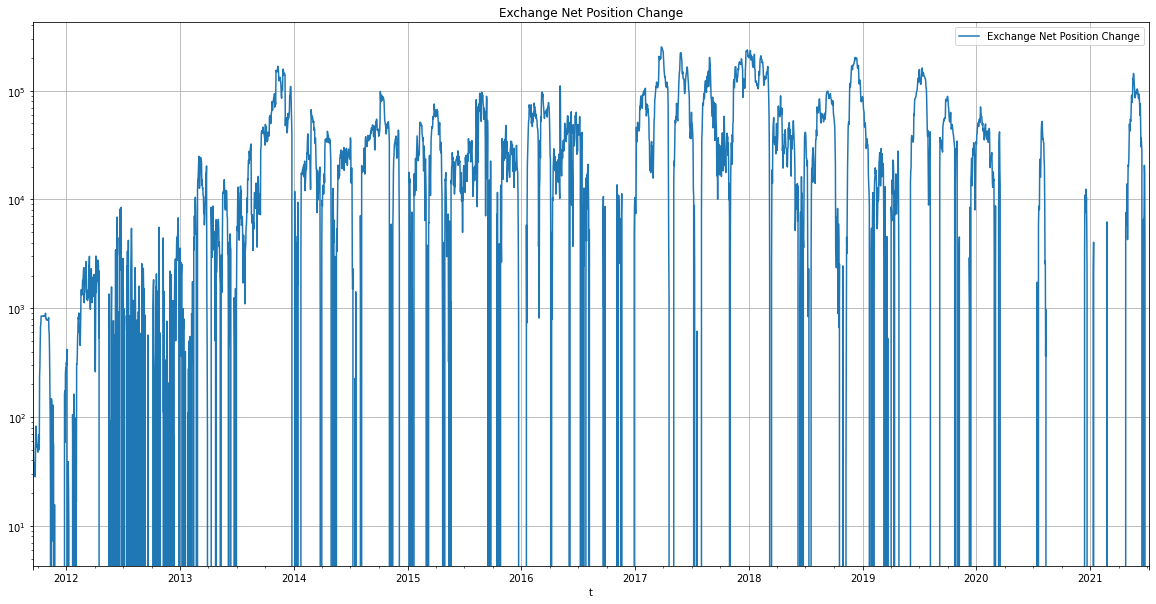

In [126]:
enpc_df.plot(figsize=(20,10), grid=True, logy=True, title='Exchange Net Position Change')

In [127]:
## Extract Grayscale Premium

In [128]:
gp = requests.get('https://api.glassnode.com/v1/metrics/institutions/grayscale_premium_percent', params={'a': coin, 'api_key': API_KEY})

In [129]:
gp_df = pd.read_json(gp.text, convert_dates=['t'])
gp_df.set_index('t', inplace=True)
gp_df = gp_df.rename(columns={'v':'Grayscale Premium'})
gp_df

Grayscale Premium
t                            
2021-01-09           0.174900
2021-01-10           0.174900
2021-01-11           0.156400
2021-01-12           0.180200
2021-01-13           0.240200
...                       ...
2021-07-04          -0.088357
2021-07-05          -0.088357
2021-07-06          -0.106131
2021-07-07          -0.115112
2021-07-08          -0.118328

[181 rows x 1 columns]

<AxesSubplot:title={'center':'Grayscale Premium'}, xlabel='t'>

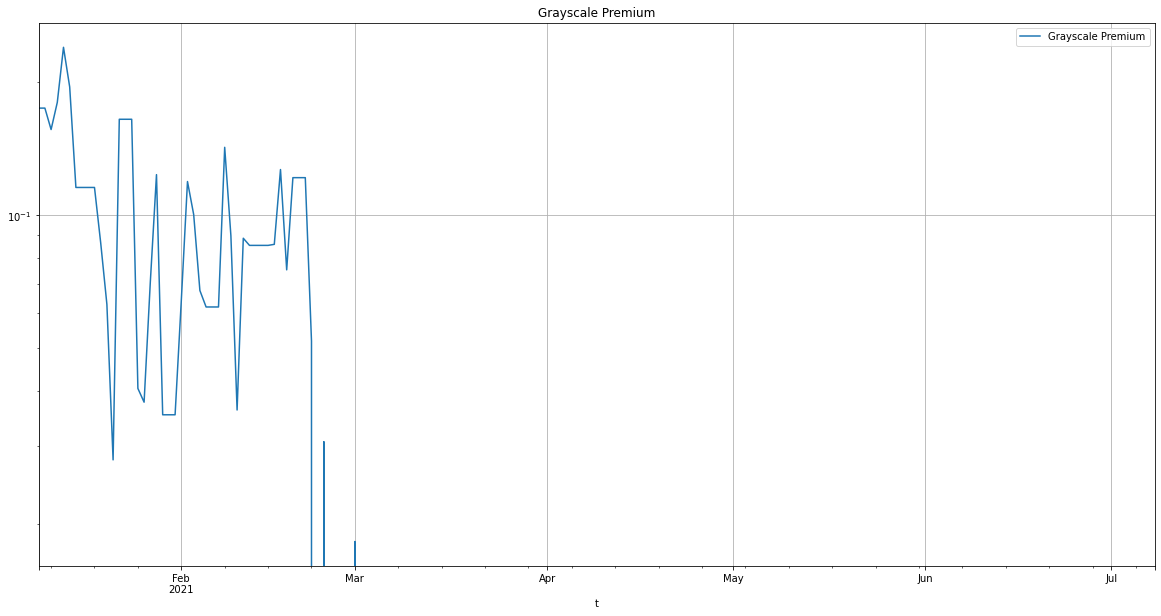

In [130]:
gp_df.plot(figsize=(20,10), grid=True, logy=True, title='Grayscale Premium')

In [131]:
## Extract Block Interval Mean

In [132]:
bim = requests.get('https://api.glassnode.com/v1/metrics/blockchain/block_interval_mean', params={'a': coin, 'api_key': API_KEY})

In [133]:
bim_df = pd.read_json(bim.text, convert_dates=['t'])
bim_df.set_index('t', inplace=True)
bim_df = bim_df.rename(columns={'v':'Block Interval Mean'})
bim_df

Block Interval Mean
t                              
2009-01-09         33506.000000
2009-01-10          2561.196721
2009-01-11           917.838710
2009-01-12           923.042553
2009-01-13           707.504065
...                         ...
2021-07-04           744.686957
2021-07-05           659.537879
2021-07-06           607.676056
2021-07-07           702.902439
2021-07-08           613.726619

[4564 rows x 1 columns]

<AxesSubplot:title={'center':'Block Interval Mean'}, xlabel='t'>

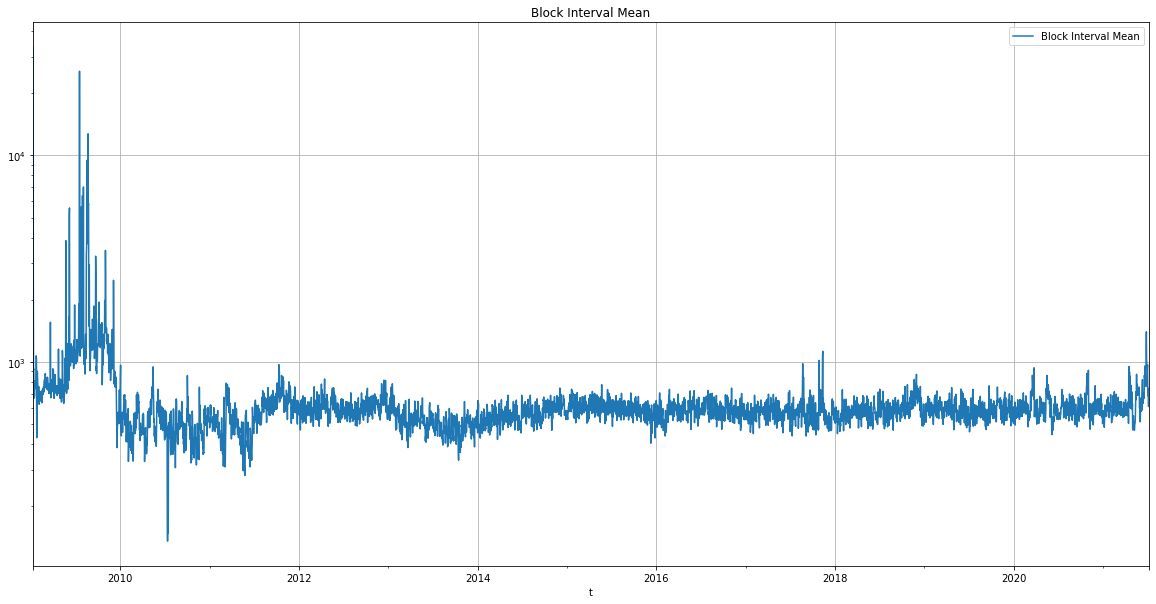

In [134]:
bim_df.plot(figsize=(20,10), grid=True, logy=True, title='Block Interval Mean')

In [135]:
# Set up the third of three sub-dataframes: Valuation

In [136]:
valuation_df_l2 = pd.concat([stf_df,mcttc_df,sopr_df,fpfr_df,felr_df,mvrv_df,puell_df,ssro_df,enpc_df,gp_df,bim_df],axis=1)
valuation_df_l2

Stock to Flow  Market Cap/Thermo Cap      SOPR  \
t                                                            
2009-01-09            NaN                    NaN       NaN   
2009-01-10            NaN                    NaN       NaN   
2009-01-11            NaN                    NaN       NaN   
2009-01-12            NaN                    NaN       NaN   
2009-01-13            NaN                    NaN       NaN   
...                   ...                    ...       ...   
2021-07-04       0.451348               0.451348  1.001935   
2021-07-05       0.427749               0.427749  0.997970   
2021-07-06       0.433471               0.433471  0.998673   
2021-07-07       0.428202               0.428202  1.001324   
2021-07-08       0.411357               0.411357  0.996299   

            Futures Perpetual Funding Rates  Futures Estimated Leverage Ratio  \
t                                                                               
2009-01-09                              NaN                               NaN   
2009-01-10                              NaN                               NaN   
2009-01-11                              NaN                               NaN   
2009-01-12                              NaN                               NaN   
2009-01-13                              NaN                               NaN   
...                                     ...                               ...   
2021-07-04                         0.000004                          0.155227   
2021-07-05                        -0.000166                          0.157663   
2021-07-06                        -0.000119                          0.156227   
2021-07-07                        -0.000009                          0.158110   
2021-07-08                        -0.000068                          0.164848   

            Market Value/Realized Value  Puell Multiple  \
t                                                         
2009-01-09                          NaN             NaN   
2009-01-10                          NaN             NaN   
2009-01-11                          NaN             NaN   
2009-01-12                          NaN             NaN   
2009-01-13                          NaN             NaN   
...                                 ...             ...   
2021-07-04                     0.155227        0.954134   
2021-07-05                     0.157663        1.058615   
2021-07-06                     0.156227        1.137611   
2021-07-07                     0.158110        0.994784   
2021-07-08                     0.164848        1.068654   

            Stablecoin Supply Ratio (SSR) Oscillator  \
t                                                      
2009-01-09                                       NaN   
2009-01-10                                       NaN   
2009-01-11                                       NaN   
2009-01-12                                       NaN   
2009-01-13                                       NaN   
...                                              ...   
2021-07-04                                 -1.663843   
2021-07-05                                 -1.681967   
2021-07-06                                 -1.659758   
2021-07-07                                 -1.629375   
2021-07-08                                 -1.662471   

            Exchange Net Position Change  Grayscale Premium  \
t                                                             
2009-01-09                           NaN                NaN   
2009-01-10                           NaN                NaN   
2009-01-11                           NaN                NaN   
2009-01-12                           NaN                NaN   
2009-01-13                           NaN                NaN   
...                                  ...                ...   
2021-07-04                 -18860.126463          -0.088357   
2021-07-05                 -19446.230046          -0.088357   
2021-07-06              

In [137]:
valuation_df_l2.corr()

Stock to Flow  \
Stock to Flow                                  1.000000   
Market Cap/Thermo Cap                          1.000000   
SOPR                                           0.399974   
Futures Perpetual Funding Rates                0.649675   
Futures Estimated Leverage Ratio              -0.315260   
Market Value/Realized Value                   -0.315260   
Puell Multiple                                 0.627973   
Stablecoin Supply Ratio (SSR) Oscillator       0.540588   
Exchange Net Position Change                   0.081734   
Grayscale Premium                              0.504772   
Block Interval Mean                           -0.298652   

                                          Market Cap/Thermo Cap      SOPR  \
Stock to Flow                                          1.000000  0.399974   
Market Cap/Thermo Cap                                  1.000000  0.399974   
SOPR                                                   0.399974  1.000000   
Futures Perpetual Funding Rates                        0.649675  0.353816   
Futures Estimated Leverage Ratio                      -0.315260  0.057942   
Market Value/Realized Value                           -0.315260  0.057942   
Puell Multiple                                         0.627973  0.439071   
Stablecoin Supply Ratio (SSR) Oscillator               0.540588  0.539357   
Exchange Net Position Change                           0.081734  0.039974   
Grayscale Premium                                      0.504772  0.475351   
Block Interval Mean                                   -0.298652 -0.262399   

                                          Futures Perpetual Funding Rates  \
Stock to Flow                                                    0.649675   
Market Cap/Thermo Cap                                            0.649675   
SOPR                                                             0.353816   
Futures Perpetual Funding Rates                                  1.000000   
Futures Estimated Leverage Ratio                                -0.515290   
Market Value/Realized Value                                     -0.515290   
Puell Multiple                                                   0.449732   
Stablecoin Supply Ratio (SSR) Oscillator                         0.143693   
Exchange Net Position Change                                     0.099258   
Grayscale Premium                                               -0.231168   
Block Interval Mean                                             -0.272308   

                                          Futures Estimated Leverage Ratio  \
Stock to Flow                                                    -0.315260   
Market Cap/Thermo Cap                                            -0.315260   
SOPR                                                              0.057942   
Futures Perpetual Funding Rates                                  -0.515290   
Futures Estimated Leverage Ratio                                  1.000000   
Market Value/Realized Value                                       1.000000   
Puell Multiple                                                   -0.439126   
Stablecoin Supply Ratio (SSR) Oscillator                         -0.008074   
Exchange Net Position Change                                     -0.433205   
Grayscale Premium                                                 0.347046   
Block Interval Mean                                              -0.244845   

                                          Market Value/Realized Value  \
Stock to Flow                                               -0.315260   
Market Cap/Thermo Cap                                       -0.315260   
SOPR                                                         0.057942   
Futures Perpetual Funding Rates                             -0.515290   
Futures Estimated Leverage Ratio                             1.000000   
Market Value/Realized Value                                  1.000000   
Puell Multiple                     

In [138]:
# Due to high correlation, drop "Market Cap/Thermo Cap" and "Market Value/Realized Value".
# Due to limited data availability, drop fplr, felr, mvrv, ssro, gp

In [139]:
valuation_df_l2 = valuation_df_l2.drop(columns=['Market Cap/Thermo Cap','Market Value/Realized Value','Futures Perpetual Funding Rates','Futures Estimated Leverage Ratio','Stablecoin Supply Ratio (SSR) Oscillator','Grayscale Premium'])
valuation_df_l2.corr()

Stock to Flow      SOPR  Puell Multiple  \
Stock to Flow                      1.000000  0.399974        0.627973   
SOPR                               0.399974  1.000000        0.439071   
Puell Multiple                     0.627973  0.439071        1.000000   
Exchange Net Position Change       0.081734  0.039974        0.264416   
Block Interval Mean               -0.298652 -0.262399       -0.409178   

                              Exchange Net Position Change  \
Stock to Flow                                     0.081734   
SOPR                                              0.039974   
Puell Multiple                                    0.264416   
Exchange Net Position Change                      1.000000   
Block Interval Mean                              -0.100665   

                              Block Interval Mean  
Stock to Flow                           -0.298652  
SOPR                                    -0.262399  
Puell Multiple                          -0.409178  
Exchange Net Position Change            -0.100665  
Block Interval Mean                      1.000000

In [140]:
# heatmap of correlation
valuation_df_l2.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=600,
    height=400
)

:HeatMap   [columns,index]   (value)

In [141]:
# Build Feature Dataframe

In [142]:
features_df = pd.concat([network_health_df_l2,buyer_and_seller_behavior_df_l2,valuation_df_l2],axis=1)
features_df

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2009-01-09             NaN                    NaN       NaN   
2009-01-10             NaN                    NaN       NaN   
2009-01-11             NaN                    NaN       NaN   
2009-01-12             NaN                    NaN       NaN   
2009-01-13             NaN                    NaN       NaN   
...                    ...                    ...       ...   
2021-07-04        850487.0           1.586243e+06  0.025518   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   

            Circulating Supply  Issuance  Difficulty     Thermocap  UTXO  CYD  \
t                                                                               
2009-01-09                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-10                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-11                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-12                 NaN       NaN         NaN           NaN   NaN  NaN   
2009-01-13                 NaN       NaN         NaN           NaN   NaN  NaN   
...                        ...       ...         ...           ...   ...  ...   
2021-07-04         18748031.25    718.75    0.059414  2.721879e+10   NaN  NaN   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   NaN  NaN   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   NaN  NaN   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   NaN  NaN   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   NaN  NaN   

            NUPL  Realized Cap  Stock to Flow      SOPR  Puell Multiple  \
t                                                                         
2009-01-09   NaN           NaN            NaN       NaN             NaN   
2009-01-10   NaN           NaN            NaN       NaN             NaN   
2009-01-11   NaN           NaN            NaN       NaN             NaN   
2009-01-12   NaN           NaN            NaN       NaN             NaN   
2009-01-13   NaN           NaN            NaN       NaN             NaN   
...          ...           ...            ...       ...             ...   
2021-07-04   NaN           NaN       0.451348  1.001935        0.954134   
2021-07-05   NaN           NaN       0.427749  0.997970        1.058615   
2021-07-06   NaN           NaN       0.433471  0.998673        1.137611   
2021-07-07   NaN           NaN       0.428202  1.001324        0.994784   
2021-07-08   NaN           NaN       0.411357  0.996299        1.068654   

            Exchange Net Position Change  Block Interval Mean  
t                                                              
2009-01-09                           NaN         33506.000000  
2009-01-10                           NaN          2561.196721  
2009-01-11                           NaN           917.838710  
2009-01-12                           NaN           923.042553  
2009-01-13                           NaN           707.504065  
...                                  ...                  ...  
2021-07-04                 -18860.126463           744.686957  
2021-07-05                 -19446.230046           659.537879  
2021-07-06                 -24006.727425           607.676056  
2021-07-07                 -29433.298439           702.902439  
2021-07-08                 -27844.809880           613.726619  

[4564 rows x 16 columns]

In [145]:
# Heatmap visualization
features_df.corr().hvplot.heatmap(
    title="Correlation among Features",
    cmap="blues",
    rot =30,
    width=1000,
    height=800
)

:HeatMap   [columns,index]   (value)

In [146]:
# Build Perceptron ML model

In [147]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [148]:
# Get BTC prices as y dataframe
btc_price_text = requests.get('https://api.glassnode.com/v1/metrics/blockchain/block_interval_mean', params={'a': coin, 'api_key': API_KEY})

In [150]:
btc_price_df = pd.read_json(btc_price_text.text, convert_dates=['t'])
btc_price_df.set_index('t', inplace=True)
btc_price_df = btc_price_df.rename(columns={'v':'BTC Prices'})
btc_price_df

BTC Prices
t                       
2009-01-09  33506.000000
2009-01-10   2561.196721
2009-01-11    917.838710
2009-01-12    923.042553
2009-01-13    707.504065
...                  ...
2021-07-05    659.537879
2021-07-06    607.676056
2021-07-07    702.902439
2021-07-08    613.726619
2021-07-09    749.125000

[4565 rows x 1 columns]

In [151]:
full_data_df = pd.concat([features_df,btc_price_df],axis=1)
full_data_df = full_data_df.drop(columns=['UTXO','CYD','NUPL','Realized Cap'])
full_data_df = full_data_df.dropna()
full_data_df

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2011-09-16         14298.0           6.686519e+05  0.091714   
2011-09-17         12877.0           3.474938e+05  0.047538   
2011-09-18         14074.0           2.909793e+05  0.039746   
2011-09-19         15826.0           3.283994e+05  0.044772   
2011-09-20         21668.0           3.465190e+05  0.047339   
...                    ...                    ...       ...   
2021-07-04        850487.0           1.586243e+06  0.025518   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   

            Circulating Supply  Issuance  Difficulty     Thermocap  \
t                                                                    
2011-09-16          7282650.00   5950.00    0.201774  1.549893e+07   
2011-09-17          7289350.00   6700.00    0.198742  1.553111e+07   
2011-09-18          7297250.00   7900.00    0.195757  1.556955e+07   
2011-09-19          7303600.00   6350.00    0.192818  1.560236e+07   
2011-09-20          7310600.00   7000.00    0.189927  1.564377e+07   
...                        ...       ...         ...           ...   
2021-07-04         18748031.25    718.75    0.059414  2.721879e+10   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   

            Stock to Flow      SOPR  Puell Multiple  \
t                                                     
2011-09-16      -0.269386  0.966420        0.683785   
2011-09-17      -0.281332  0.979530        0.766186   
2011-09-18      -0.175390  0.981822        0.913495   
2011-09-19      -0.110628  0.968994        0.782018   
2011-09-20       0.001172  0.998393        0.981353   
...                   ...       ...             ...   
2021-07-04       0.451348  1.001935        0.954134   
2021-07-05       0.427749  0.997970        1.058615   
2021-07-06       0.433471  0.998673        1.137611   
2021-07-07       0.428202  1.001324        0.994784   
2021-07-08       0.411357  0.996299        1.068654   

            Exchange Net Position Change  Block Interval Mean  BTC Prices  
t                                                                          
2011-09-16                     74.789093           727.445378  727.445378  
2011-09-17                     69.740065           649.186567  649.186567  
2011-09-18                     30.148647           552.993671  552.993671  
2011-09-19                     38.196675           676.834646  676.834646  
2011-09-20                     36.377675           620.750000  620.750000  
...                                  ...                  ...         ...  
2021-07-04                 -18860.126463           744.686957  744.686957  
2021-07-05                 -19446.230046           659.537879  659.537879  
2021-07-06                 -24006.727425           607.676056  607.676056  
2021-07-07                 -29433.298439           702.902439  702.902439  
2021-07-08                 -27844.809880           613.726619  613.726619  

[3584 rows x 13 columns]

In [152]:
X = full_data_df.drop(columns='BTC Prices')
X

Active Address  Total Transfer Volume  Velocity  \
t                                                             
2011-09-16         14298.0           6.686519e+05  0.091714   
2011-09-17         12877.0           3.474938e+05  0.047538   
2011-09-18         14074.0           2.909793e+05  0.039746   
2011-09-19         15826.0           3.283994e+05  0.044772   
2011-09-20         21668.0           3.465190e+05  0.047339   
...                    ...                    ...       ...   
2021-07-04        850487.0           1.586243e+06  0.025518   
2021-07-05        920363.0           1.439888e+06  0.017975   
2021-07-06        838259.0           1.332011e+06  0.020433   
2021-07-07        812872.0           1.324880e+06  0.022266   
2021-07-08        800764.0           3.250505e+06  0.022810   

            Circulating Supply  Issuance  Difficulty     Thermocap  \
t                                                                    
2011-09-16          7282650.00   5950.00    0.201774  1.549893e+07   
2011-09-17          7289350.00   6700.00    0.198742  1.553111e+07   
2011-09-18          7297250.00   7900.00    0.195757  1.556955e+07   
2011-09-19          7303600.00   6350.00    0.192818  1.560236e+07   
2011-09-20          7310600.00   7000.00    0.189927  1.564377e+07   
...                        ...       ...         ...           ...   
2021-07-04         18748031.25    718.75    0.059414  2.721879e+10   
2021-07-05         18748856.25    825.00    0.068791  2.724693e+10   
2021-07-06         18749743.75    887.50    0.078526  2.727725e+10   
2021-07-07         18750512.50    768.75    0.088585  2.730382e+10   
2021-07-08         18751381.25    868.75    0.098761  2.733241e+10   

            Stock to Flow      SOPR  Puell Multiple  \
t                                                     
2011-09-16      -0.269386  0.966420        0.683785   
2011-09-17      -0.281332  0.979530        0.766186   
2011-09-18      -0.175390  0.981822        0.913495   
2011-09-19      -0.110628  0.968994        0.782018   
2011-09-20       0.001172  0.998393        0.981353   
...                   ...       ...             ...   
2021-07-04       0.451348  1.001935        0.954134   
2021-07-05       0.427749  0.997970        1.058615   
2021-07-06       0.433471  0.998673        1.137611   
2021-07-07       0.428202  1.001324        0.994784   
2021-07-08       0.411357  0.996299        1.068654   

            Exchange Net Position Change  Block Interval Mean  
t                                                              
2011-09-16                     74.789093           727.445378  
2011-09-17                     69.740065           649.186567  
2011-09-18                     30.148647           552.993671  
2011-09-19                     38.196675           676.834646  
2011-09-20                     36.377675           620.750000  
...                                  ...                  ...  
2021-07-04                 -18860.126463           744.686957  
2021-07-05                 -19446.230046           659.537879  
2021-07-06                 -24006.727425           607.676056  
2021-07-07                 -29433.298439           702.902439  
2021-07-08                 -27844.809880           613.726619  

[3584 rows x 12 columns]

In [153]:
y = full_data_df['BTC Prices']
y

t
2011-09-16    727.445378
2011-09-17    649.186567
2011-09-18    552.993671
2011-09-19    676.834646
2011-09-20    620.750000
                 ...    
2021-07-04    744.686957
2021-07-05    659.537879
2021-07-06    607.676056
2021-07-07    702.902439
2021-07-08    613.726619
Freq: D, Name: BTC Prices, Length: 3584, dtype: float64

In [154]:
# Divide data set into traning and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.9)

In [161]:
# Instantiate data scaler
scaler = StandardScaler()

# Fit the Scaler with the training data
# X_scaler = scaler.fit(X_train)
X_scaler = scaler.fit(X)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled =X_scaler.transform(X)

In [156]:
# Define the Perceptron model - deep neural net with two hidden layers
number_input_features = len(X_train.iloc[0])
number_output = 1
hidden_nodes_layer1 = round((number_input_features + number_output) // 2)
hidden_nodes_layer2 = round((hidden_nodes_layer1 + number_output) // 2)
# hidden_nodes_layer3 = round((hidden_nodes_layer2 + number_output) // 2)

In [157]:
# Create a sequential neural network model
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
#nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Add the output layer
nn.add(Dense(units=number_output, activation="linear")) 

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 78        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"]) 

# Fit the model
percepton_model = nn.fit(X_train_scaled, y_train, epochs=100)
# percepton_model = nn.fit(X_scaled, y, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 346254.0625 - mse: 346254.0625
Epoch 2/100
101/101 [==============================] - 0s 1ms/step - loss: 345179.9688 - mse: 345179.9688
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 343549.5312 - mse: 343549.5312
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 340294.4375 - mse: 340294.4375
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 334173.6562 - mse: 334173.6562
Epoch 6/100
101/101 [==============================] - 0s 1ms/step - loss: 324382.7500 - mse: 324382.7500
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 310744.5938 - mse: 310744.5938
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 293461.0938 - mse: 293461.0938
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 272985.8125 - mse: 272985.8125
Epoch 10/100
101/101 [========================

In [159]:
# Evaluate the model using testing data
model_loss, model_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)

12/12 - 0s - loss: 186.7105 - mse: 186.7105


In [160]:
# Make predictions using X_test_scaled
predictions =nn.predict(X_test_scaled)

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"Predicted BTC Price": predictions.ravel(), "Actual BTC Price": y_test})
results.head(20)

Predicted BTC Price  Actual BTC Price
t                                                
2016-10-22           600.739319        581.429530
2013-12-07           454.303619        453.661538
2011-12-18           594.853760        589.916667
2015-01-17           630.399170        633.514493
2016-03-26           556.594116        552.627451
2013-10-04           502.819366        498.027778
2013-10-11           473.097107        468.291892
2012-10-13           591.403137        597.824324
2014-06-18           551.777832        551.259494
2014-01-09           433.420013        431.091787
2014-02-27           470.517487        482.313830
2021-03-22           564.771973        574.251656
2016-11-23           565.038147        582.482993
2018-09-27           600.590271        599.048951
2017-05-31           529.610352        525.560976
2014-07-10           613.985596        601.281879
2015-02-15           620.915527        640.785714
2012-11-09           616.065918        623.447368
2018-05-25           481.891998        488.676136
2020-07-29           603.037109        581.304054

In [256]:
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline


In [257]:
X_scaled_df=pd.DataFrame(X_scaled)
X_scaled_df

0         1         2         3         4         5         6   \
0    -1.349909 -0.487879 -0.014186 -2.362561  1.402931  0.854481 -0.804956   
1    -1.354036 -0.639955 -0.269862 -2.360459  1.785778  0.822977 -0.804951   
2    -1.350560 -0.666716 -0.314955 -2.357981  2.398332  0.791950 -0.804946   
3    -1.345472 -0.648997 -0.285867 -2.355990  1.607116  0.761413 -0.804941   
4    -1.328506 -0.640417 -0.271011 -2.353794  1.938916  0.731378 -0.804936   
...        ...       ...       ...       ...       ...       ...       ...   
3579  1.078454 -0.053379 -0.397304  1.233669 -1.267422 -0.624825  2.987874   
3580  1.281380 -0.122681 -0.440958  1.233928 -1.213185 -0.527386  2.991797   
3581  1.042943 -0.173763 -0.426733  1.234206 -1.181282 -0.426233  2.996025   
3582  0.969217 -0.177140 -0.416124  1.234447 -1.241899 -0.321704  2.999729   
3583  0.934055  0.734689 -0.412976  1.234720 -1.190853 -0.215964  3.003715   

            7         8         9         10        11  
0    -1.820880 -1.588545 -0.714630 -0.396595  1.888390  
1    -1.858291 -1.027502 -0.638921 -0.396687  0.866692  
2    -1.526507 -0.929428 -0.503574 -0.397414 -0.389143  
3    -1.323688 -1.478398 -0.624374 -0.397266  1.227648  
4    -0.973558 -0.220275 -0.441227 -0.397300  0.495441  
...        ...       ...       ...       ...       ...  
3579  0.436288 -0.068728 -0.466235 -0.744058  2.113485  
3580  0.362383 -0.238407 -0.370239 -0.754813  1.001832  
3581  0.380300 -0.208303 -0.297659 -0.838500  0.324756  
3582  0.363799 -0.094852 -0.428887 -0.938080  1.567973  
3583  0.311047 -0.309918 -0.361016 -0.908931  0.403748  

[3584 rows x 12 columns]

In [258]:
X_reset_index = X.reset_index()
column_names = X_reset_index.iloc[0,1:13]
column_names = pd.DataFrame(column_names)
column_names = column_names.reset_index()
column_names

index            0
0                 Active Address        14298
1          Total Transfer Volume       668652
2                       Velocity    0.0917143
3             Circulating Supply  7.28265e+06
4                       Issuance         5950
5                     Difficulty     0.201774
6                      Thermocap  1.54989e+07
7                  Stock to Flow    -0.269386
8                           SOPR      0.96642
9                 Puell Multiple     0.683785
10  Exchange Net Position Change      74.7891
11           Block Interval Mean      727.445

In [259]:
ds = X_reset_index.iloc[:,0]
ds

0      2011-09-16
1      2011-09-17
2      2011-09-18
3      2011-09-19
4      2011-09-20
          ...    
3579   2021-07-04
3580   2021-07-05
3581   2021-07-06
3582   2021-07-07
3583   2021-07-08
Name: t, Length: 3584, dtype: datetime64[ns]

In [260]:
target_day_feature_range = pd.DataFrame(columns=['yhat', 'yhat_lower', 'yhat_upper'])
target_day_feature_range['Feature']=column_names['index']
target_day_feature_range = target_day_feature_range.set_index('Feature')
target_day_feature_range

yhat yhat_lower yhat_upper
Feature                                                
Active Address                NaN        NaN        NaN
Total Transfer Volume         NaN        NaN        NaN
Velocity                      NaN        NaN        NaN
Circulating Supply            NaN        NaN        NaN
Issuance                      NaN        NaN        NaN
Difficulty                    NaN        NaN        NaN
Thermocap                     NaN        NaN        NaN
Stock to Flow                 NaN        NaN        NaN
SOPR                          NaN        NaN        NaN
Puell Multiple                NaN        NaN        NaN
Exchange Net Position Change  NaN        NaN        NaN
Block Interval Mean           NaN        NaN        NaN

In [269]:
forecast_period = 7
n=0
for item in column_names['index']:
    column_prophet = X_scaled_df[n]
    column_prophet = pd.concat([ds,column_prophet], axis=1)
    column_prophet.columns = ['ds', 'y']
    m = Prophet()
    # Fit the time series model
    m.fit(column_prophet)
    # Create a future DataFrame to hold predictions. Make the prediction go out as far as 7 days
    column_future = m.make_future_dataframe(periods=forecast_period, freq='D')
    # Make a forecast based on the future DataFrame
    column_forecast = m.predict(column_future)
    column_forecast = column_forecast.iloc[-1,0:2]
    # Append results
    target_day_feature_range = target_day_feature_range.append(column_forecast)
    n+=1
target_day_feature_range

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

yhat  yhat_lower  yhat_upper  \
Feature                                                          
Active Address                     NaN         NaN         NaN   
Total Transfer Volume              NaN         NaN         NaN   
Velocity                           NaN         NaN         NaN   
Circulating Supply                 NaN         NaN         NaN   
Issuance                           NaN         NaN         NaN   
Difficulty                         NaN         NaN         NaN   
Thermocap                          NaN         NaN         NaN   
Stock to Flow                      NaN         NaN         NaN   
SOPR                               NaN         NaN         NaN   
Puell Multiple                     NaN         NaN         NaN   
Exchange Net Position Change       NaN         NaN         NaN   
Block Interval Mean                NaN         NaN         NaN   
3590                          1.784751    1.482816    2.093827   
3590                          1.784751    1.500229    2.100863   
3590                          1.784751    1.471404    2.091612   
3590                          0.004235   -1.046458    1.165008   
3590                         -0.481791   -1.646998    0.551347   
3590                          1.259516    1.249776    1.269160   
3590                         -1.369678   -1.721921   -1.016629   
3590                         -0.954048   -1.262465   -0.625298   
3590                          2.647517    2.564842    2.730003   
3590                          1.155157    0.593670    1.713563   
3590                          0.417330   -0.820258    1.460676   
3590                          0.099594   -0.771455    0.992193   
3590                         -1.333170   -2.397462   -0.245454   
3590                          0.744220   -0.314773    1.885026   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   
3590                               NaN         NaN         NaN   

                              additive_terms  additive_terms_lower  \
Feature                                                              
Active Address                           NaN                   NaN   
Total Transfer Volume                    NaN                   NaN   
Velocity                                 NaN                   NaN   
Circulating Supply                       NaN                   NaN   
Issuance                                 NaN                   NaN   
Difficulty                               NaN                   NaN   
Thermocap                                

In [177]:

# active_address_prophet = X_scaled_df[0]
# active_address_prophet = pd.concat([ds,active_address_prophet], axis=1)
# active_address_prophet.columns = ['ds', 'y']
# active_address_prophet

ds         y
0    2011-09-16 -1.349909
1    2011-09-17 -1.354036
2    2011-09-18 -1.350560
3    2011-09-19 -1.345472
4    2011-09-20 -1.328506
...         ...       ...
3579 2021-07-04  1.078454
3580 2021-07-05  1.281380
3581 2021-07-06  1.042943
3582 2021-07-07  0.969217
3583 2021-07-08  0.934055

[3584 rows x 2 columns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
0    2011-09-16 -1.450027   -1.747606   -1.114870
1    2011-09-17 -1.563543   -1.868556   -1.260258
2    2011-09-18 -1.619395   -1.917565   -1.315328
3    2011-09-19 -1.465224   -1.779569   -1.173617
4    2011-09-20 -1.423120   -1.717881   -1.111415
...         ...       ...         ...         ...
3586 2021-07-11  1.597800    1.318515    1.895065
3587 2021-07-12  1.756196    1.445912    2.049518
3588 2021-07-13  1.802415    1.506142    2.121378
3589 2021-07-14  1.796244    1.491619    2.102476
3590 2021-07-15  1.784751    1.473336    2.101836

[3591 rows x 4 columns]

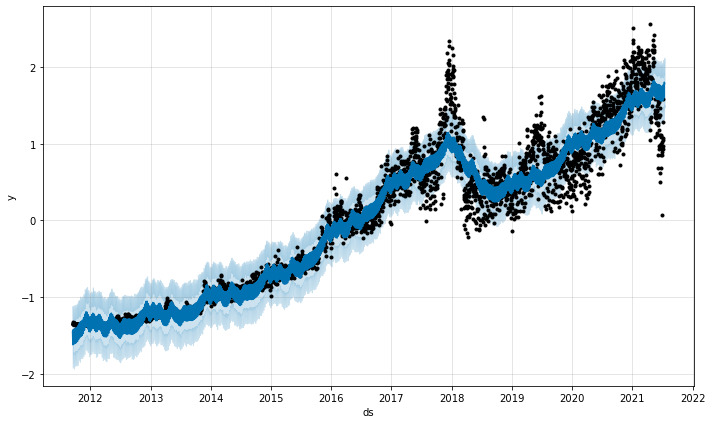

In [205]:
# Fit the time series model
m.fit(active_address_prophet)

# Create a future DataFrame to hold predictions. Make the prediction go out as far as 7 days
active_address_future = m.make_future_dataframe(periods=7, freq='D')

# Make a forecast based on the future DataFrame
active_address_forecast = m.predict(active_address_future)

# Plot the forecast using the model’s plot function
m.plot(active_address_forecast)

# Display the underlying forecast dataframe (tail)
condensed_active_address_forecast = active_address_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
condensed_active_address_forecast

In [206]:
target_day_feature_range = target_day_feature_range.append(condensed_active_address_forecast.iloc[-1,:])
target_day_feature_range.iloc[0,0]='Active Address'
target_day_feature_range

Feature      yhat  yhat_lower  yhat_upper         ds
3590  Active Address  1.784751    1.473336    2.101836 2021-07-15